# Big Mart Sales Prediction

### Project Goal:
The primary goal of this project is to build and evaluate a robust machine learning model that can accurately predict the sales of various products at different Big Mart outlets. The aim is to achieve the highest possible prediction accuracy and create a well-documented, reproducible solution that demonstrates a comprehensive understanding of the end-to-end data science process.
___

### Poject Problem
The problem is to predict the `Item_Outlet_Sales` for a given set of products and outlets. Big Mart, a retail giant, wants to understand the factors that influence product sales in their various outlets. Accurately predicting future sales for each product in each store will help the company optimize product placement, manage inventory, and make data-driven decisions to boost overall revenue. This is a **regression** problem, where the target variable is continuous.


***Dataset Source:*** https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets
___

## 1. Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from lightgbm import LGBMRegressor
import joblib

In [2]:
import random
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
df_original = pd.read_csv("D:/Downloads/archive (3)/train.csv")
df = df_original.copy() # work on copied dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 2. Understanding data and Initial EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
print("\n--- Descriptive statistics of numerical data ---")
df.describe()


--- Descriptive statistics of numerical data ---


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
print("\n--- Descriptive statistics of categorical data ---")
df.describe(include="object")


--- Descriptive statistics of categorical data ---


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [6]:
print("\n--- Value counts for categorical features ---")
categorical_cols = ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type",
                    "Outlet_Type", "Outlet_Establishment_Year"]
for colm in categorical_cols:
    if colm in df.columns:
        print(f"\nValue counts for {colm}:")
        print(df[colm].value_counts(dropna=False))  # Show NaNs in value_counts
        print("=="*20)


--- Value counts for categorical features ---

Value counts for Item_Identifier:
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64

Value counts for Item_Fat_Content:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Value counts for Item_Type:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Value counts for Outlet_I


--- Distribution of unprocessed numerical and target variable (Item_Outlet_Sales) ---


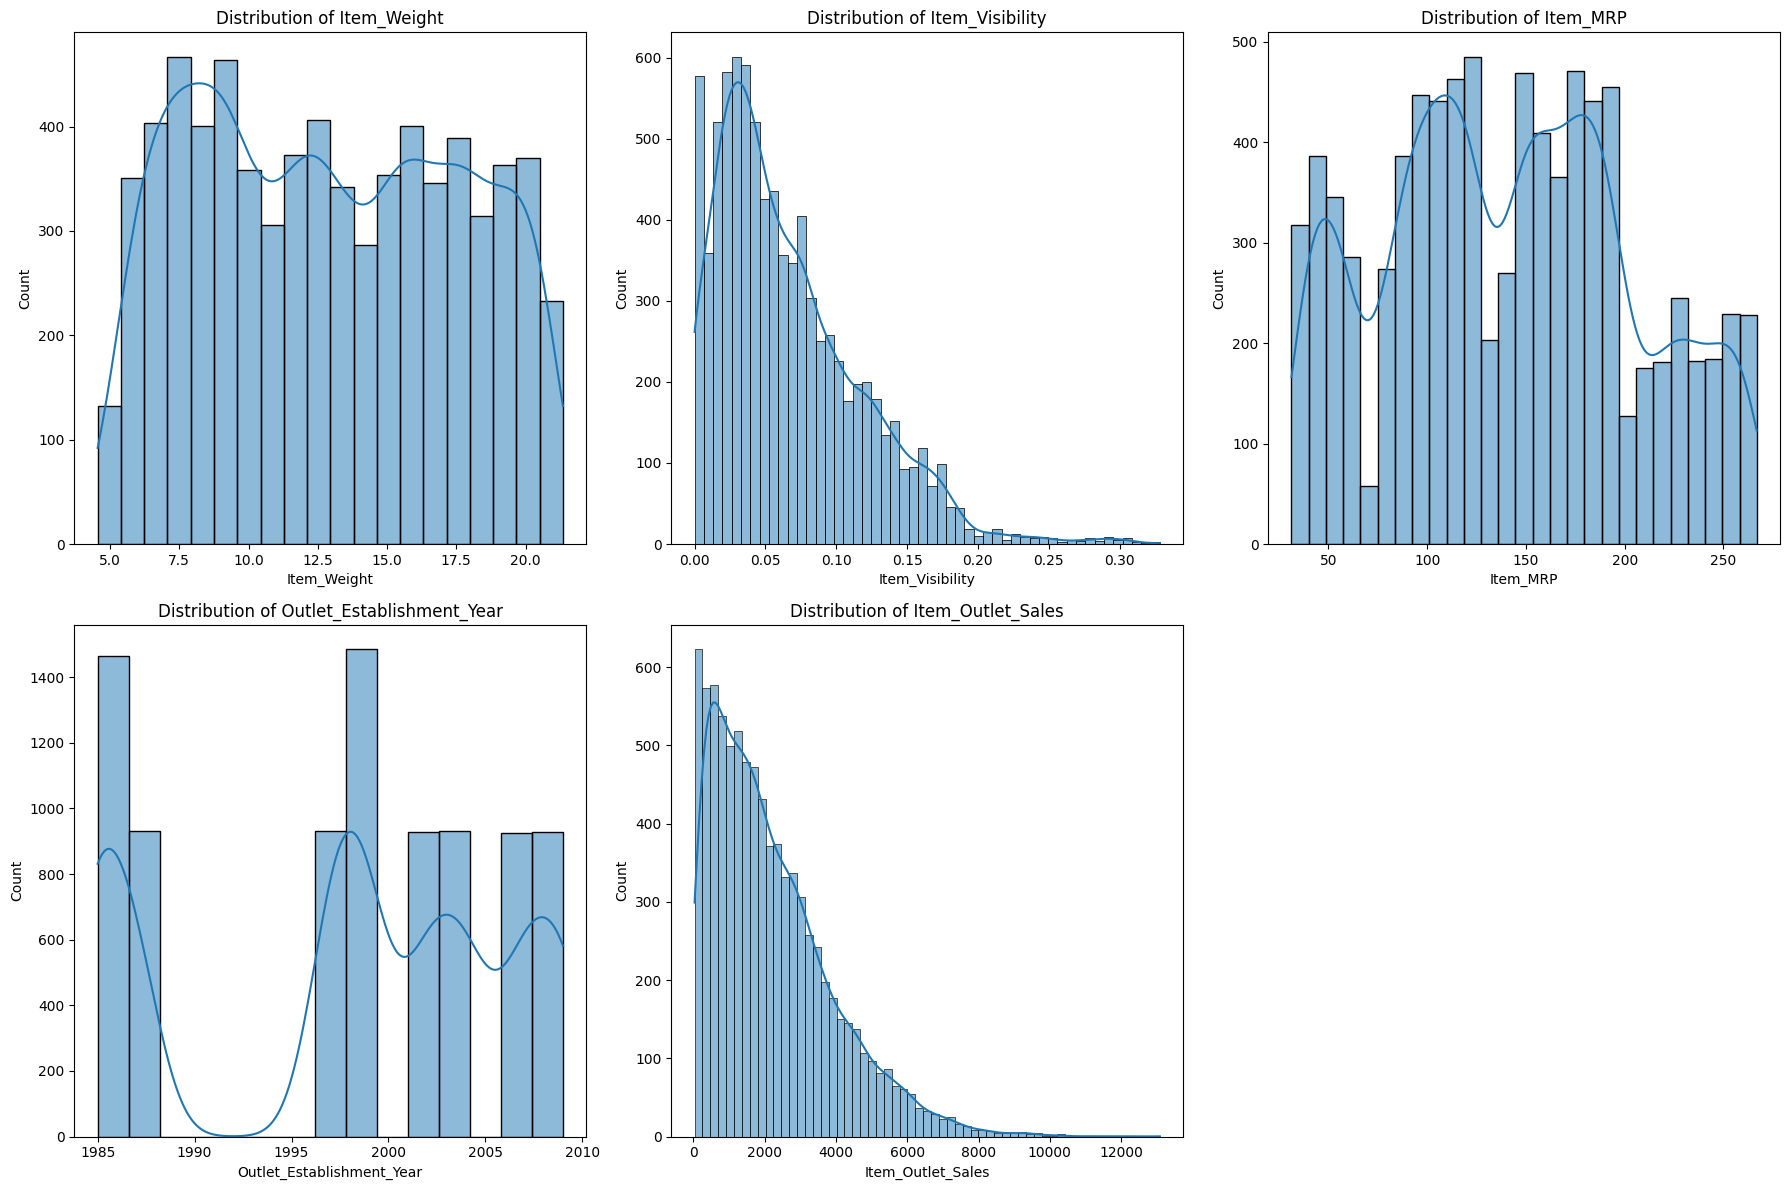

In [7]:
numerical_cols = ["Item_Weight", "Item_Visibility",	"Item_MRP",	"Outlet_Establishment_Year",	"Item_Outlet_Sales"]
print('\n--- Distribution of unprocessed numerical and target variable (Item_Outlet_Sales) ---')
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

- **Item_Weight:** The distribution appears somewhat uniform, with a slight tendency for more items to fall in the 7.5 to 12.5 and 15 to 18 ranges. There are no clear strong peaks, suggesting item weights are relatively spread out across the observed range.  Item weights primarily range from approximately 5 to 20 units.

- **Item_Visibility:** This is a highly right-skewed (or positively skewed) distribution, meaning the tail extends much further to the right. There's a very strong peak at the lower end of item visibility. Item visibility values are concentrated between 0.00 and 0.10, with a few items having higher visibility up to around 0.30.

- **Item_MRP:**  The distribution of Item_MRP appears to be multi-modal, with several distinct peaks. There are noticeable peaks around 70-80, 100-110, 130-150, 170-190, and a smaller peak around 240-250. Item MRPs range from approximately 30 to 270.

- **Outlet_Establishment_Year:** This histogram shows distinct spikes at specific years, indicating that outlets were established in particular batches or periods. There are major peaks around 1985, 1998, and 2007. Outlet establishment years range from 1985 to 2009. Big Mart seems to have opened a significant number of its outlets in specific years (e.g., 1985, 1998, 2007). This could correspond to periods of aggressive expansion or the opening of new store formats.

- **Item_Outlet_Sales:** This is another highly right-skewed distribution, similar to Item_Visibility. There's a strong concentration of sales at the lower end, with a long tail extending to higher sales values. Most item sales are concentrated below 2000, with a few items generating sales up to around 12,000.

## 3. Data Cleaning and Preprocessing

### 3.1 Missing Value Imputation

In [8]:
print("\n--- Missing Values before Imputation ---")
df.isnull().sum()


--- Missing Values before Imputation ---


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are only two columns with missing values, `Item_Weight` a numerical column and `Outlet_Size` a categorical column.



*   **Outlet_Size:** It is highly probable that `Outlet_Type` and `Outlet_Size` are correlated. For example if we take `Grocery Store` as `Outlet_Type` then, `Grocery Store` outlets are typically smaller in size, focusing on everyday essentials. It's improbable they would be classified as "High" size. They are most likely "Small" or sometimes "Medium". `Supermarket Type1` outlets are generally the most common and standard supermarket format. These can range from "Small" to "Medium" or even "High" depending on the specific store and location. However, "Medium" is often the most prevalent. In conclusion, we will impute missing values based on the most frequent `Outlet_size` for each `Outlet_Type`.

*   **Distribution of Item_Weight:** The histogram showed a distribution that was somewhat uniform, without extreme skewness or clear outliers on one side. There were slight tendencies for more items to fall into certain weight ranges, but it didn't look heavily skewed to one side or the other, nor did it have a very long tail. So, we will go with the mean for `Item_Weight` imputation, as its distribution appears relatively symmetrical or uniform.



#### 3.1.1 Imputing missing values in categorical Features

In [9]:
# ---  Explore the relationship between Outlet_Type and Outlet_Size using Crosstabulation ---
print("\n--- Crosstabulation of Outlet_Type and Outlet_Size ---")
crosstab = pd.crosstab(df['Outlet_Type'], df['Outlet_Size'], dropna=False) # dropna=False to include NaNs if any in 'Outlet_Size'
crosstab


--- Crosstabulation of Outlet_Type and Outlet_Size ---


Outlet_Size,High,Medium,Small,NaN
Outlet_Type,,,,
Grocery Store,0,0,528,555
Supermarket Type1,932,930,1860,1855
Supermarket Type2,0,928,0,0
Supermarket Type3,0,935,0,0


In [10]:
# To see proportions, which is often more insightful:
print("\n--- Proportions of Outlet_Size within each Outlet_Type ---")
crosstab_prop = pd.crosstab(df['Outlet_Type'], df['Outlet_Size'], normalize='index', dropna=False)
crosstab_prop


--- Proportions of Outlet_Size within each Outlet_Type ---


Outlet_Size,High,Medium,Small,NaN
Outlet_Type,,,,
Grocery Store,0.000000,0.000000,0.487535,0.512465
Supermarket Type1,0.167115,0.166756,0.333513,0.332616
Supermarket Type2,0.000000,1.000000,0.000000,0.000000
Supermarket Type3,0.000000,1.000000,0.000000,0.000000


In [11]:
# ---  Impute missing values based on the most frequent size for each type ---
#  Find the most frequent Outlet_Size for each Outlet_Type
#  We will use a dictionary to store these mappings
outlet_type_size_mapping = df.groupby('Outlet_Type')['Outlet_Size'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
).to_dict()

print("\n--- Imputation Mapping ---")
print(outlet_type_size_mapping)


--- Imputation Mapping ---
{'Grocery Store': 'Small', 'Supermarket Type1': 'Small', 'Supermarket Type2': 'Medium', 'Supermarket Type3': 'Medium'}


In [12]:
# Fill missing 'Outlet_Size' values using the mapping
df['Outlet_Size'] = df.apply(
    lambda row: outlet_type_size_mapping[row['Outlet_Type']] if pd.isna(row['Outlet_Size']) else row['Outlet_Size'],
    axis=1
)

In [13]:
print("\nMissing values after imputation:")
print(df['Outlet_Size'].isnull().sum())


Missing values after imputation:
0


#### 3.1.2 Imputing missing values in Numerical Features.

In [14]:
# Impute Item_Weight with mean
mean_Item_Weight = df['Item_Weight'].mean()
df.fillna({'Item_Weight':mean_Item_Weight}, inplace=True)
print(f"Filled NaNs in Item_Weight with mean: {mean_Item_Weight}")

Filled NaNs in Item_Weight with mean: 12.857645184135976


In [15]:
print("\n--- Missing Values After Imputation in training data ---")
df.isnull().sum()


--- Missing Values After Imputation in training data ---


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 3.2. Train-Test Splitting

In [16]:
# --- Separate Independent Features (X) and Target Feature (y) ---
X = df.drop("Item_Outlet_Sales", axis=1)
y = df["Item_Outlet_Sales"]
print(f"\nIndependent Features (X) shape: {X.shape}")
print(f"Target Feature (y) shape: {y.shape}")

# --- Split data into training and testing sets ---
# Using a common split of 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
print(f"\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Independent Features (X) shape: (8523, 11)
Target Feature (y) shape: (8523,)

Data split into training and testing sets:
X_train shape: (6818, 11)
X_test shape: (1705, 11)
y_train shape: (6818,)
y_test shape: (1705,)


## 3.3 Feature Engineering

We are going to create two new following features:

1. **`Outlet_Age`:** This numerical feature represents how old an outlet is.

  * **Reasoning:** Older outlets might have more established customer bases, better brand recognition, or different operational efficiencies compared to newer ones, all of which can influence sales.

2. **`Item_MRP_Category`:** This categorical feature groups Item_MRP (Maximum Retail Price) into distinct price tiers.

  * **Reasoning:** As observed in the histogram, `Item_MRP` has multiple peaks, suggesting natural pricing segments. Items in different price categories often appeal to different customer segments and thus have different sales volumes.




### 3.3.1. Feature Engineering for Train set

In [17]:
# ---  Create 'Outlet_Age' feature ---
current_year = 2025
X_train['Outlet_Age'] = current_year - X_train['Outlet_Establishment_Year']
print(f"\n'Outlet_Age' feature created (calculated from {current_year}).")

# ---  Create 'Item_MRP_Category' feature ---
# Based on the multi-modal distribution observed for Item_MRP
bins = [0, 100, 150, 200, np.inf]
labels = ['Low', 'Mid', 'High', 'Very High']
X_train['Item_MRP_Category'] = pd.cut(X_train['Item_MRP'], bins=bins, labels=labels, right=False)
print("\n'Item_MRP_Category' feature created.")


'Outlet_Age' feature created (calculated from 2025).

'Item_MRP_Category' feature created.


### 3.3.2. Feature Engineering for Test set

In [18]:
# ---  Create 'Outlet_Age' feature ---
X_test['Outlet_Age'] = current_year - X_test['Outlet_Establishment_Year']
print(f"\n'Outlet_Age' feature created for test set (calculated from {current_year}).")

# ---  Create 'Item_MRP_Category' feature ---
X_test['Item_MRP_Category'] = pd.cut(X_test['Item_MRP'], bins=bins, labels=labels, right=False)
print("\n'Item_MRP_Category' feature created for test set.")


'Outlet_Age' feature created for test set (calculated from 2025).

'Item_MRP_Category' feature created for test set.


In [19]:
print(f'shape of train set: {X_train.shape}')
print(f'shape of test set: {X_test.shape}')

shape of train set: (6818, 13)
shape of test set: (1705, 13)


### 3.3 Handling Skewed numerical Features

#### 3.3.1. Log Transformation

In [20]:
# Item_Visibility and Item_Outlet_Sales are positively skewed.
print("\n--- Applying Log Transformation to Skewed Numerical Features ---")
X_train['Item_Visibility_log'] = np.log1p(X_train['Item_Visibility']) # training set
X_test['Item_Visibility_log'] = np.log1p(X_test['Item_Visibility'])   # testing set
print("Applied Log Transformation to 'Item_Visibility'")


--- Applying Log Transformation to Skewed Numerical Features ---
Applied Log Transformation to 'Item_Visibility'


In [21]:
y_train_df = pd.DataFrame({'Item_Outlet_Sales':y_train, 'Item_Outlet_Sales_log':np.log1p(y_train)}) # training target
y_test_df = pd.DataFrame({'Item_Outlet_Sales':y_test, 'Item_Outlet_Sales_log':np.log1p(y_test)}) # testing target
print("Applied Log Transformation to 'Item_Outlet_Sales'")

Applied Log Transformation to 'Item_Outlet_Sales'


#### 3.3.2 Square Root Transformation

In [22]:
# --- Apply Square Root Transformation on train and test set---
X_train['Item_Visibility_sqrt'] = np.sqrt(X_train['Item_Visibility'])
X_test['Item_Visibility_sqrt'] = np.sqrt(X_test['Item_Visibility'])

# --- Apply Square Root Transformation on train and test targets---
y_train_df['Item_Outlet_Sales_sqrt'] = np.sqrt(y_train_df['Item_Outlet_Sales'])
y_test_df['Item_Outlet_Sales_sqrt'] = np.sqrt(y_test_df['Item_Outlet_Sales'])

### 3.4 Handling Inconsistent Entries for Item_Fat_Content

In [23]:
# Get unique values in Item_Fat_Content
unique_fat_content_train = X_train['Item_Fat_Content'].unique()
unique_fat_content_test = X_test['Item_Fat_Content'].unique()

print("\nUnique values in 'Item_Fat_Content' feature from Train set:")
print(unique_fat_content_train)

print("\nUnique values in 'Item_Fat_Content' feature from Test set:")
print(unique_fat_content_test)


Unique values in 'Item_Fat_Content' feature from Train set:
['Regular' 'Low Fat' 'reg' 'low fat' 'LF']

Unique values in 'Item_Fat_Content' feature from Test set:
['Low Fat' 'Regular' 'reg' 'LF' 'low fat']


In [24]:
X_train.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)
X_test.replace({"Item_Fat_Content":{"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)

In [25]:
print("\n--- Unique values in Item_Fat_Content after correcting inconsistent entries from train set ---")
print(X_train["Item_Fat_Content"].unique())

print("\n--- Unique values in Item_Fat_Content after correcting inconsistent entries from test set ---")
print(X_test["Item_Fat_Content"].unique())


--- Unique values in Item_Fat_Content after correcting inconsistent entries from train set ---
['Regular' 'Low Fat']

--- Unique values in Item_Fat_Content after correcting inconsistent entries from test set ---
['Low Fat' 'Regular']


## 4. Further EDA on Processed Training Data

In [26]:
# training set information after processing
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            6818 non-null   object  
 1   Item_Weight                6818 non-null   float64 
 2   Item_Fat_Content           6818 non-null   object  
 3   Item_Visibility            6818 non-null   float64 
 4   Item_Type                  6818 non-null   object  
 5   Item_MRP                   6818 non-null   float64 
 6   Outlet_Identifier          6818 non-null   object  
 7   Outlet_Establishment_Year  6818 non-null   int64   
 8   Outlet_Size                6818 non-null   object  
 9   Outlet_Location_Type       6818 non-null   object  
 10  Outlet_Type                6818 non-null   object  
 11  Outlet_Age                 6818 non-null   int64   
 12  Item_MRP_Category          6818 non-null   category
 13  Item_Visibility_log        6818 non-

In [27]:
# information of training target
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Outlet_Sales       6818 non-null   float64
 1   Item_Outlet_Sales_log   6818 non-null   float64
 2   Item_Outlet_Sales_sqrt  6818 non-null   float64
dtypes: float64(3)
memory usage: 213.1 KB


### 4.1. Univariate Analysis (Visualizations for Numerical Features after Transformation)


--- Distribution of processed numerical and target variable (Item_Outlet_Sales) ---


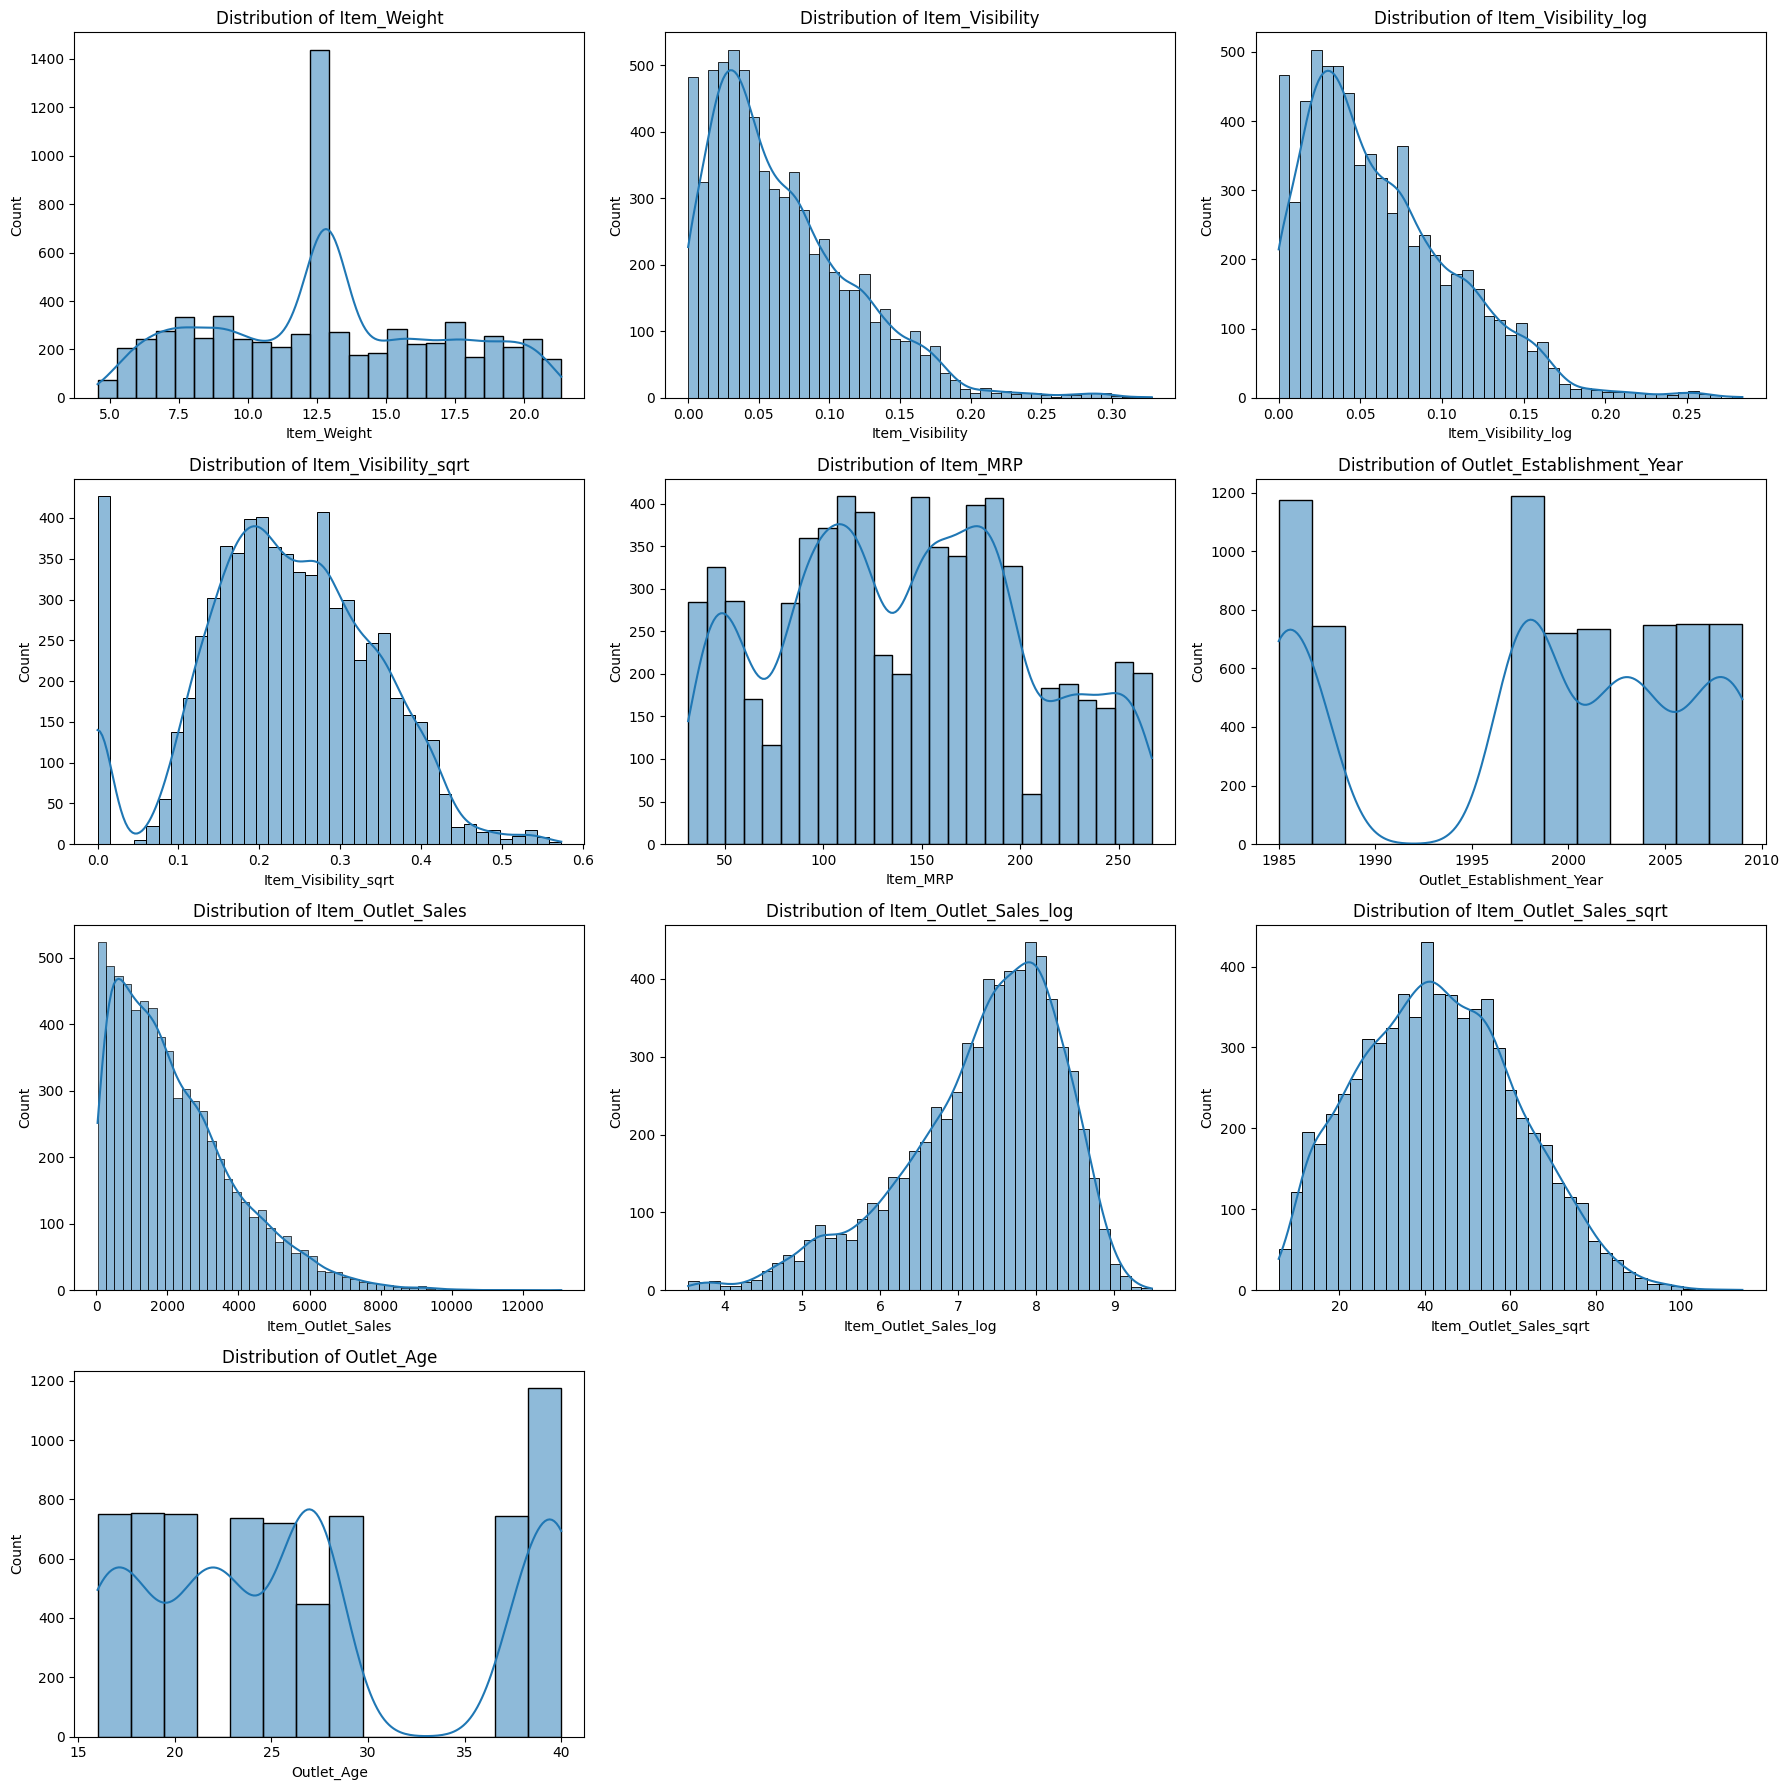

In [28]:
numerical_cols_processed = ["Item_Weight", "Item_Visibility", "Item_Visibility_log", "Item_Visibility_sqrt", "Item_MRP",
                            "Outlet_Establishment_Year", "Item_Outlet_Sales", "Item_Outlet_Sales_log", "Item_Outlet_Sales_sqrt",
                            "Outlet_Age"]

print('\n--- Distribution of processed numerical and target variable (Item_Outlet_Sales) ---')
plt.figure(figsize=(18, 18))
for i, col in enumerate(numerical_cols_processed):
    plt.subplot(4, 3, i + 1)
    if col in X_train.columns:
        sns.histplot(X_train[col], kde=True)
        plt.title(f'Distribution of {col}')
    else:
        sns.histplot(y_train_df[col], kde=True)
        plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

##### ***Item_Visibility (Original vs Log Transformed vs SQRT Transformed)***

- **Item_Visibility_log (log transformed):** This histogram shows a distribution that is significantly more symmetrical and closer to a normal (bell-shaped) curve compared to the **Item_Visibility (original)** right-skewed distribution. The log transformation has successfully pulled the values together and reduced the long tail.

- **Item_Visibility_sqrt (Square Root Transformed):** This histogram still appears positively (right) skewed. While the square root transformation has reduced the skewness somewhat compared to the original, it's clearly not as effective as the log transformation in making the distribution symmetrical.

**Conclusion for** `Item_Visibility`: The Log Transformation is generally better for **Item_Visibility** as it results in a distribution that is much closer to normal, which is often beneficial for linear models.

##### ***Item_Outlet_Sales (Original vs Log Transformed vs SQRT Transformed)***

- **Item_Outlet_Sales (Log Transformed):** This histogram clearly shows a negatively (left) skewed distribution. The log transformation over-corrected the original positive skewness.

- **Item_Outlet_Sales (Square Root Transformed):** This histogram shows a distribution that is much more symmetrical and closer to a normal curve than both the original positively skewed distribution and the log-transformed negatively skewed distribution. It appears to have done a good job of balancing the spread.

**Conclusion for** `Item_Outlet_Sales`: The Square Root Transformation is generally better for Item_Outlet_Sales as it produces a distribution that is significantly more symmetrical and less skewed than the log-transformed version. For target variables in regression, aiming for a more normal distribution is usually preferred.

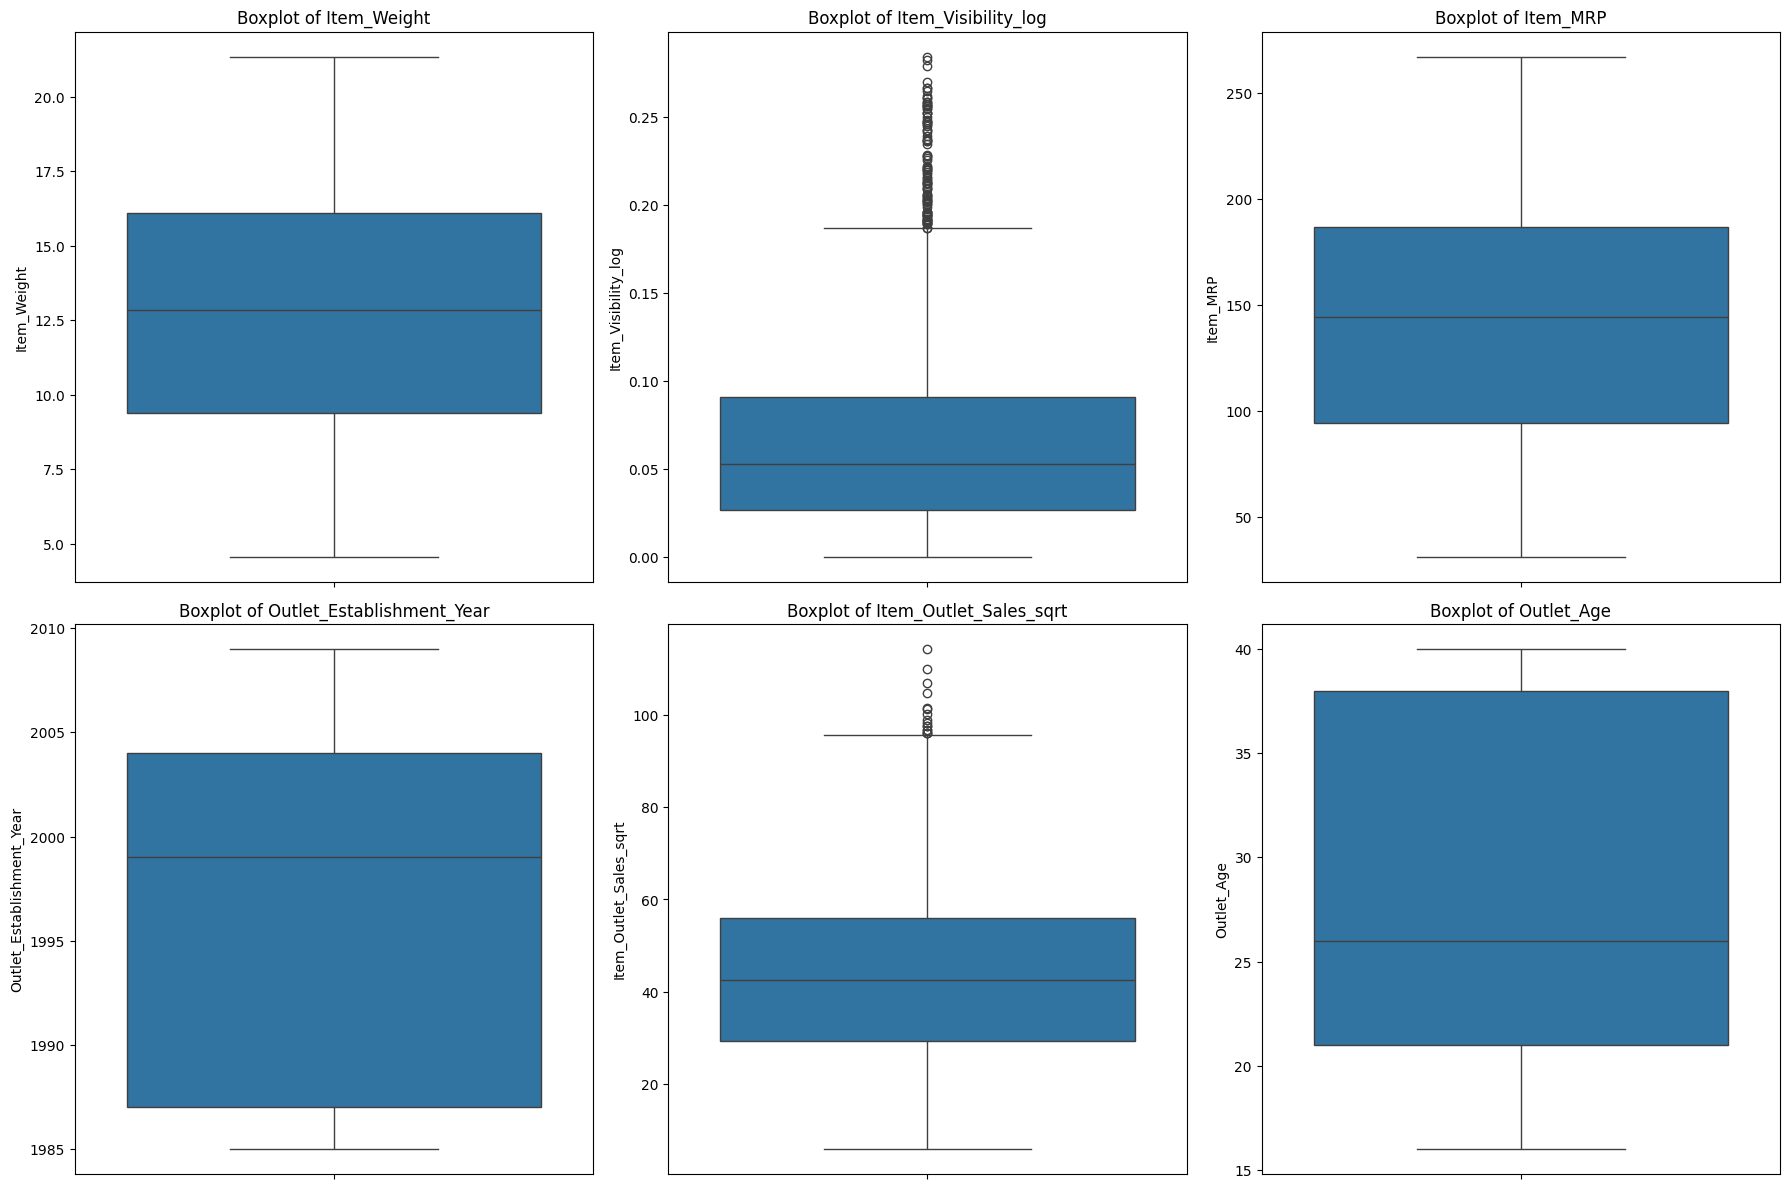

In [29]:
numerical_cols_processed1 = ["Item_Weight", "Item_Visibility_log", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales_sqrt",
                            "Outlet_Age"] # Item_Visibility, Item_Outlet_Sales, Item_Visibility_sqrt, Item_Outlet_Sales_log removed.
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols_processed1):
    plt.subplot(2, 3, i + 1)
    if col in X_train.columns:
        sns.boxplot(y=X_train[col])
        plt.title(f'Boxplot of {col}')
    else:
        sns.boxplot(y=y_train_df[col])
        plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### 4.2 Bivariate Analysis (Features vs Target)

#### 4.2.1 Bivariate Analysis: Numerical Features vs. Target Variable (Item_Outlet_Sales_sqrt)

In [30]:
numerical_features = ["Item_Weight", "Item_MRP", "Outlet_Establishment_Year", "Outlet_Age", "Item_Visibility_log"]

print("\n--- Numerical Features vs. Item_Outlet_Sales_sqrt ---")

# Calculate and print Pearson correlation coefficients
print("\nPearson Correlation with Item_Outlet_Sales_sqrt:")
for col in numerical_features:
    correlation = X_train[col].corr(y_train_df['Item_Outlet_Sales_sqrt'])
    print(f"{col}: {correlation:.4f}")


--- Numerical Features vs. Item_Outlet_Sales_sqrt ---

Pearson Correlation with Item_Outlet_Sales_sqrt:
Item_Weight: 0.0045
Item_MRP: 0.5621
Outlet_Establishment_Year: 0.0045
Outlet_Age: -0.0045
Item_Visibility_log: -0.1656


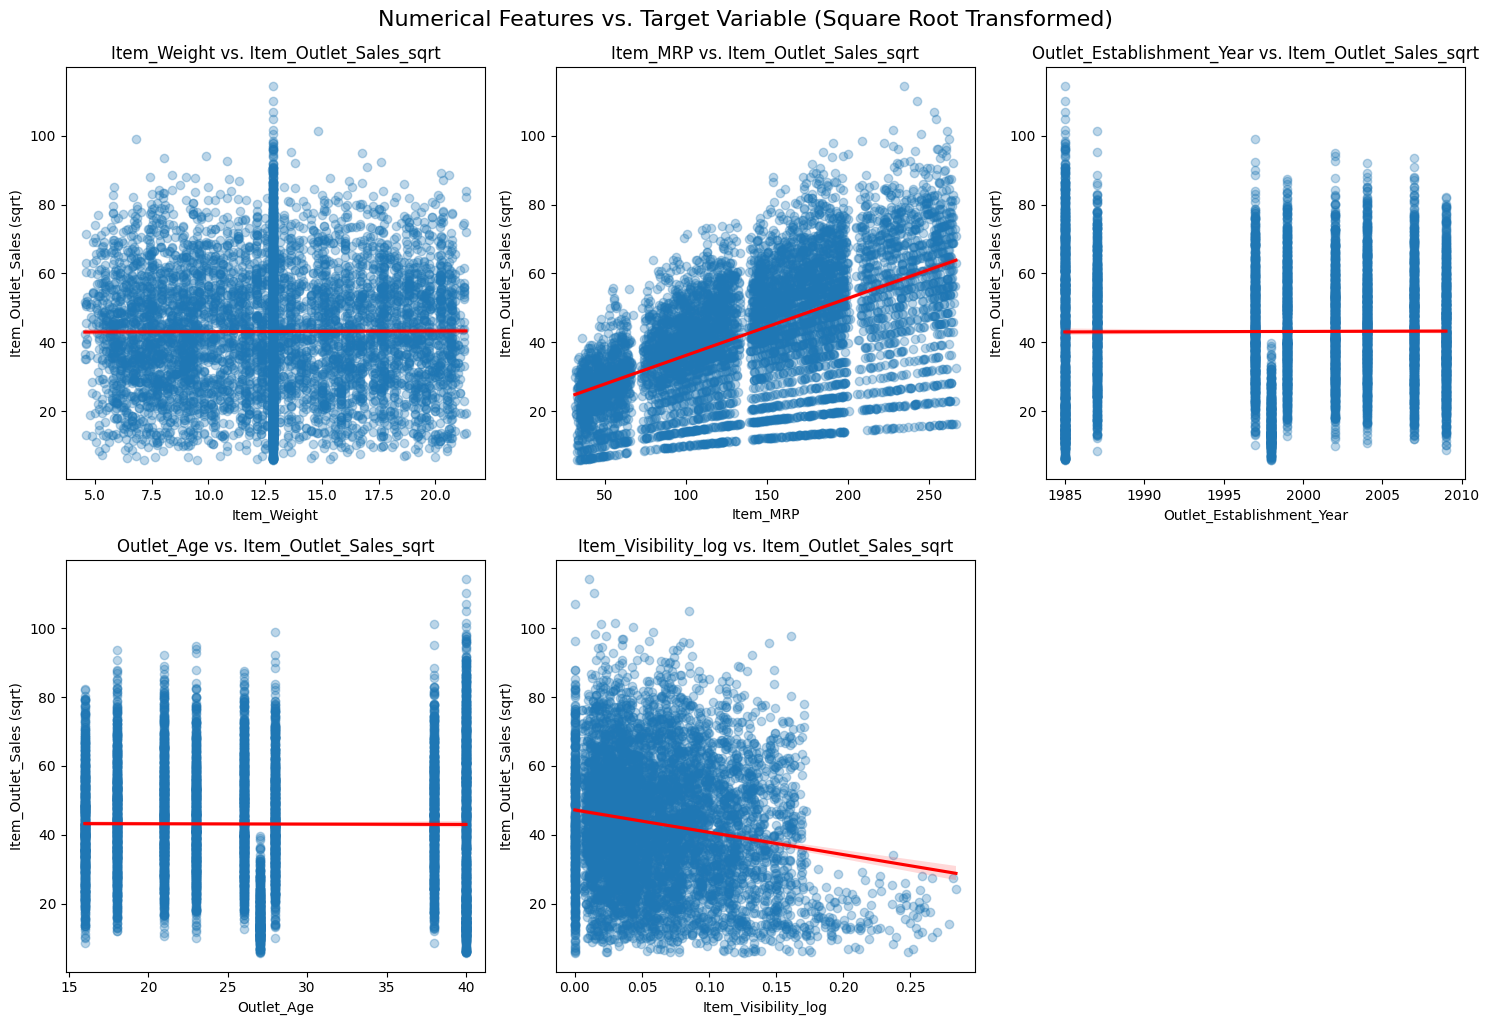

In [31]:
# Create scatter plots with regression line
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.regplot(x=X_train[feature], y=y_train_df['Item_Outlet_Sales_sqrt'], scatter_kws={"alpha":0.3}, line_kws={"color": "red"})
    plt.title(f"{feature} vs. Item_Outlet_Sales_sqrt")
    plt.xlabel(feature)
    plt.ylabel("Item_Outlet_Sales (sqrt)")
plt.tight_layout()
plt.suptitle("Numerical Features vs. Target Variable (Square Root Transformed)", y=1.02, fontsize=16)
plt.show()

#### 4.2.2 Bivariate Analysis: Categorical Features vs. Target Variable (Item_Outlet_Sales_sqrt)

In [32]:
categorical_features = ["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Item_MRP_Category"]


--- Categorical Features vs. Item_Outlet_Sales_sqrt ---


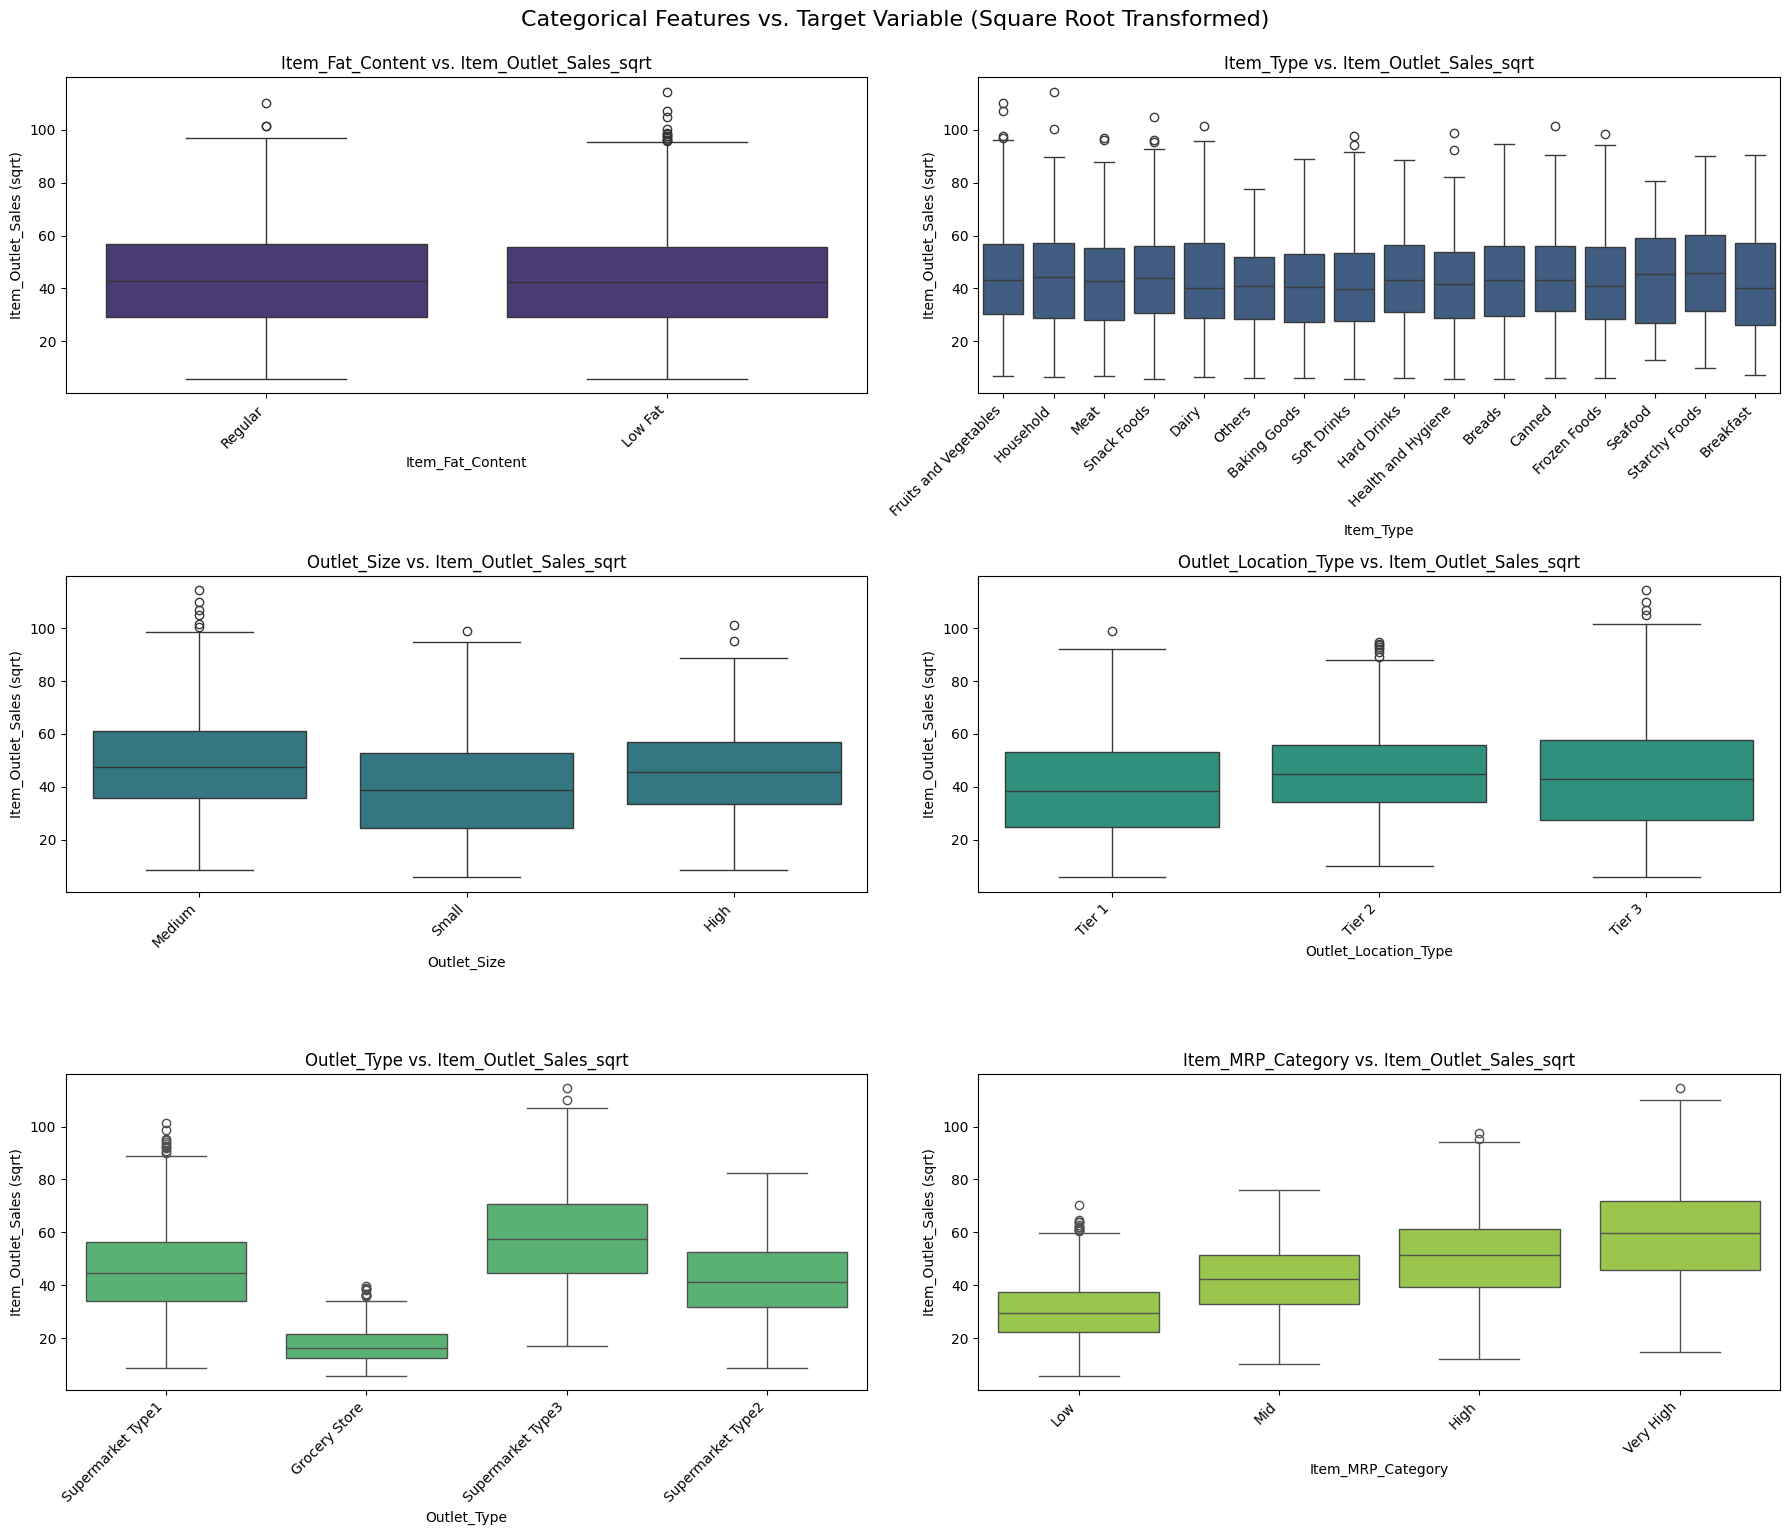

In [33]:
print("\n--- Categorical Features vs. Item_Outlet_Sales_sqrt ---")
colors = sns.color_palette("viridis", len(categorical_features))
# Create box plots for each categorical feature against the target variable
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=X_train[feature], y=y_train_df['Item_Outlet_Sales_sqrt'], color=colors[i])
    plt.title(f"{feature} vs. Item_Outlet_Sales_sqrt")
    plt.xlabel(feature)
    plt.ylabel("Item_Outlet_Sales (sqrt)")
    plt.xticks(rotation=45, ha="right") # Rotate labels for better readability
plt.tight_layout()
plt.suptitle("Categorical Features vs. Target Variable (Square Root Transformed)", y=1.02, fontsize=16)
plt.show()

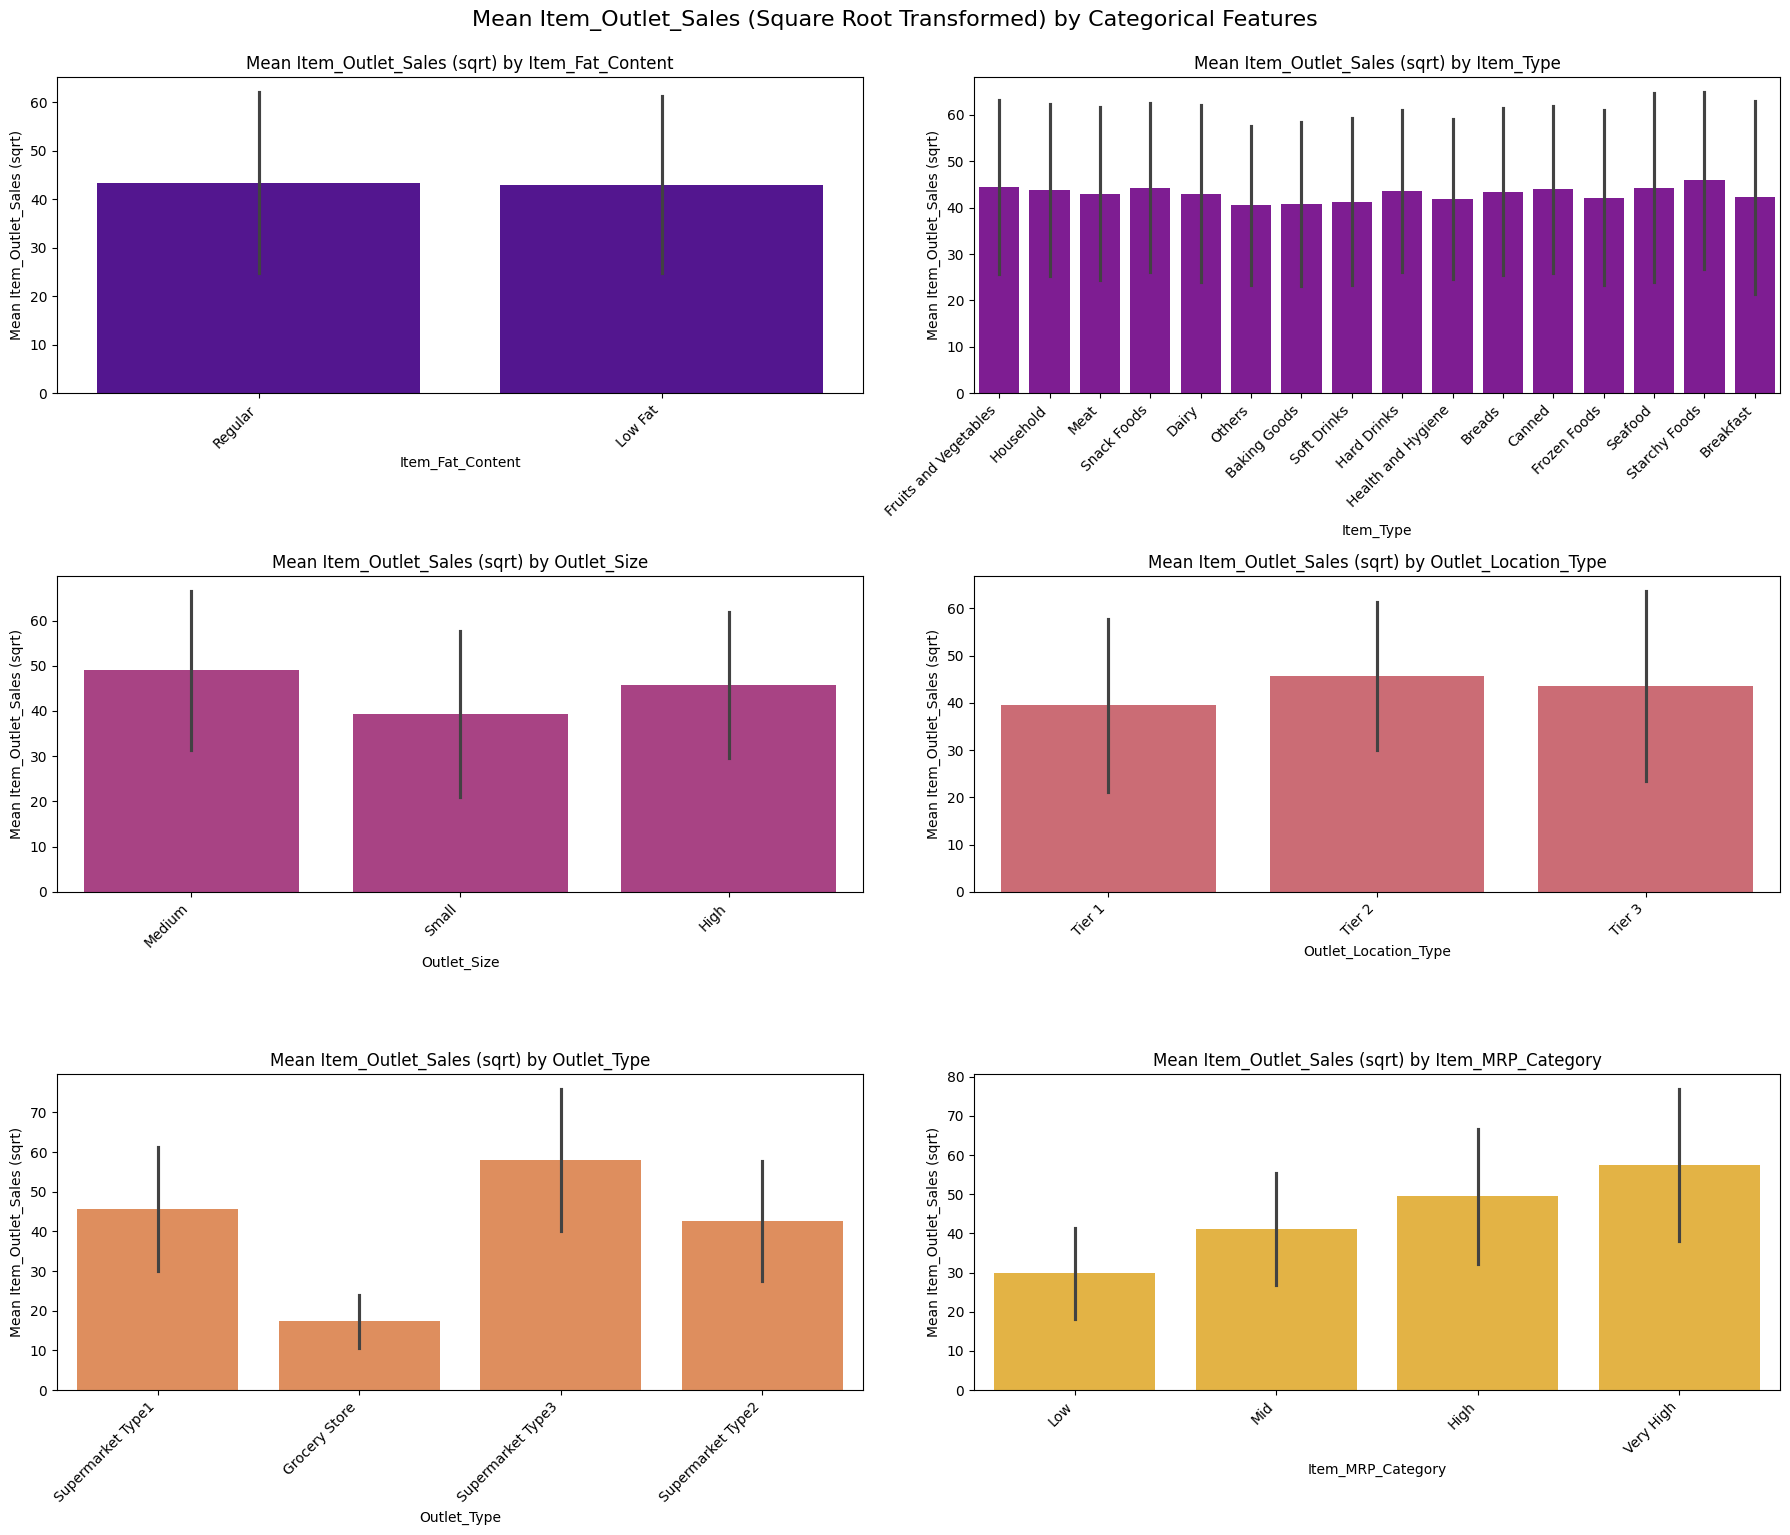

In [34]:
colors1 = sns.color_palette("plasma", len(categorical_features))
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    # Bar plot to show the mean of Item_Outlet_Sales_sqrt for each category
    sns.barplot(x=X_train[feature], y=y_train_df['Item_Outlet_Sales_sqrt'], errorbar='sd', color=colors1[i]) # errorbar='sd' shows standard deviation
    plt.title(f'Mean Item_Outlet_Sales (sqrt) by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Mean Item_Outlet_Sales (sqrt)')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.suptitle('Mean Item_Outlet_Sales (Square Root Transformed) by Categorical Features', y=1.02, fontsize=16)
plt.show()

### 4.3 Correlation Heatmap (with numerical features)

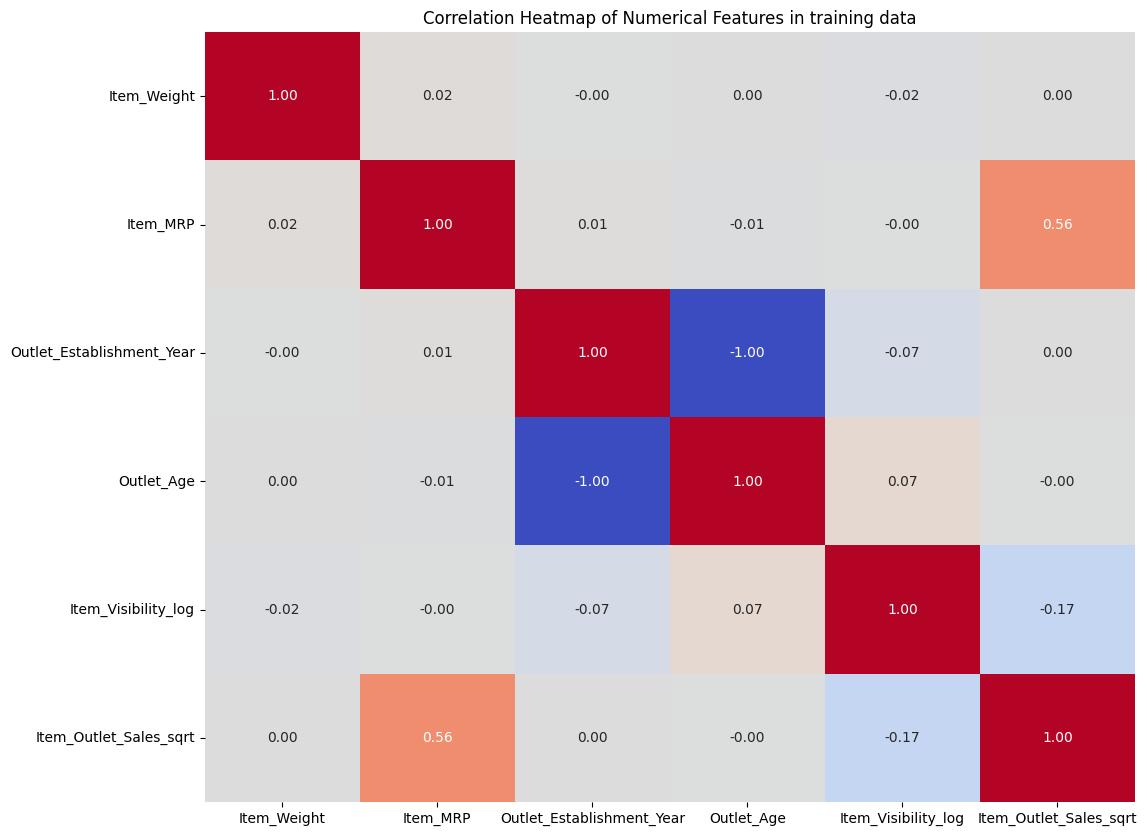

In [35]:
num_features = ["Item_Weight", "Item_MRP", "Outlet_Establishment_Year", "Outlet_Age", "Item_Visibility_log", "Item_Outlet_Sales_sqrt"]
temp_df_for_corr = pd.concat([X_train, y_train_df], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(temp_df_for_corr[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Heatmap of Numerical Features in training data')
plt.show()

The correlation matrix provides clear evidence:

- `Item_MRP` is the most linearly impactful numerical feature on `Item_Outlet_Sales_sqrt` (target variable).

- `Item_Visibility_log` has a minor, negative linear impact.

- `Item_Weight` and `Outlet_Age` show negligible linear correlation with sales.

- Importantly, there's **no significant multicollinearity** among numerical independent features (their correlations with each other are all very close to zero). This is good for models that are sensitive to multicollinearity.

Model Selection based on Correlation Matrix:

- **For Linear Models (e.g., Linear Regression, Ridge, Lasso)**: Features with very low linear correlation and no clear non-linear patterns can sometimes be dropped to simplify the model, reduce noise, and potentially improve performance, but this is not a good idea.

- **For Tree-Based Models (e.g., Decision Tree, Random Forest, XGBoost)**: These models are generally robust to irrelevant features. They will effectively "ignore" features that don't contribute to improving prediction accuracy.

- **Conclusion:** We will use Random Forest Regressor and XGBoost Regressor to train the model.

## 5. Feature Scaling and Encoding

In [36]:
X_train.drop(["Item_Identifier", "Item_Visibility", "Outlet_Identifier", "Item_Visibility_sqrt"], axis=1, inplace=True)
X_test.drop(["Item_Identifier", "Item_Visibility", "Outlet_Identifier", "Item_Visibility_sqrt"], axis=1, inplace=True)
y_train_df = y_train_df['Item_Outlet_Sales_sqrt']
y_test_df = y_test_df['Item_Outlet_Sales_sqrt']

In [37]:
print(f'shape of X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train_df.shape}, y_test: {y_test_df.shape}')

shape of X_train: (6818, 11), X_test: (1705, 11), y_train: (6818,), y_test: (1705,)


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6818 entries, 549 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                6818 non-null   float64 
 1   Item_Fat_Content           6818 non-null   object  
 2   Item_Type                  6818 non-null   object  
 3   Item_MRP                   6818 non-null   float64 
 4   Outlet_Establishment_Year  6818 non-null   int64   
 5   Outlet_Size                6818 non-null   object  
 6   Outlet_Location_Type       6818 non-null   object  
 7   Outlet_Type                6818 non-null   object  
 8   Outlet_Age                 6818 non-null   int64   
 9   Item_MRP_Category          6818 non-null   category
 10  Item_Visibility_log        6818 non-null   float64 
dtypes: category(1), float64(3), int64(2), object(5)
memory usage: 592.8+ KB


In [39]:
num_cols = ['Item_Weight', 'Item_MRP', 'Outlet_Age', 'Item_Visibility_log']
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
            'Item_MRP_Category']

# Create a preprocessing pipeline for numerical and categorical features using ColumnTransformer
# StandardScaler is for numerical, OneHotEncoder for categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

# Apply the preprocessing to the training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Shape of X_train after preprocessing: {X_train_processed.shape}")
print(f"Shape of X_test after preprocessing: {X_test_processed.shape}")

Shape of X_train after preprocessing: (6818, 45)
Shape of X_test after preprocessing: (1705, 45)


In [40]:
# DataFrame of processed columns
X_train_processed_df = pd.DataFrame(X_train_processed.toarray(), columns=preprocessor.get_feature_names_out())
X_test_processed_df = pd.DataFrame(X_test_processed.toarray(), columns=preprocessor.get_feature_names_out())

In [41]:
X_train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   num__Item_Weight                      6818 non-null   float64
 1   num__Item_MRP                         6818 non-null   float64
 2   num__Outlet_Age                       6818 non-null   float64
 3   num__Item_Visibility_log              6818 non-null   float64
 4   cat__Item_Fat_Content_Low Fat         6818 non-null   float64
 5   cat__Item_Fat_Content_Regular         6818 non-null   float64
 6   cat__Item_Type_Baking Goods           6818 non-null   float64
 7   cat__Item_Type_Breads                 6818 non-null   float64
 8   cat__Item_Type_Breakfast              6818 non-null   float64
 9   cat__Item_Type_Canned                 6818 non-null   float64
 10  cat__Item_Type_Dairy                  6818 non-null   float64
 11  cat__Item_Type_Fr

In [42]:
print("--- first 5 rows of processed X_train ---")
X_train_processed_df.head()

--- first 5 rows of processed X_train ---


,num__Item_Weight,num__Item_MRP,num__Outlet_Age,num__Item_Visibility_log,cat__Item_Fat_Content_Low Fat,cat__Item_Fat_Content_Regular,cat__Item_Type_Baking Goods,cat__Item_Type_Breads,cat__Item_Type_Breakfast,cat__Item_Type_Canned,...,cat__Outlet_Location_Type_Tier 2,cat__Outlet_Location_Type_Tier 3,cat__Outlet_Type_Grocery Store,cat__Outlet_Type_Supermarket Type1,cat__Outlet_Type_Supermarket Type2,cat__Outlet_Type_Supermarket Type3,cat__Item_MRP_Category_High,cat__Item_MRP_Category_Low,cat__Item_MRP_Category_Mid,cat__Item_MRP_Category_Very High
0,-0.800211,0.470709,-0.136169,-0.600681,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.211317,0.457877,-0.493521,-0.350446,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.116657,-0.482625,0.102066,0.222716,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.078275,-1.603553,-0.493521,-0.710963,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.007432,0.218375,0.102066,1.395890,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
print("--- first 5 rows of processd X_test ---")
X_test_processed_df.head()

--- first 5 rows of processd X_test ---


,num__Item_Weight,num__Item_MRP,num__Outlet_Age,num__Item_Visibility_log,cat__Item_Fat_Content_Low Fat,cat__Item_Fat_Content_Regular,cat__Item_Type_Baking Goods,cat__Item_Type_Breads,cat__Item_Type_Breakfast,cat__Item_Type_Canned,...,cat__Outlet_Location_Type_Tier 2,cat__Outlet_Location_Type_Tier 3,cat__Outlet_Type_Grocery Store,cat__Outlet_Type_Supermarket Type1,cat__Outlet_Type_Supermarket Type2,cat__Outlet_Type_Supermarket Type3,cat__Item_MRP_Category_High,cat__Item_MRP_Category_Low,cat__Item_MRP_Category_Mid,cat__Item_MRP_Category_Very High
0,0.335711,-0.998908,1.293240,-0.784218,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.171752,-1.586048,0.102066,0.124069,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.383041,-1.596652,-0.136169,-0.475731,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.005623,0.508453,1.531475,-0.405394,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.635739,0.889079,-0.731756,-1.072701,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## 7. Modeling

### 7.1 Random Forest Model Training

In [44]:
# --- Train and Evaluate Random Forest Regressor ---
print("\n--- Training Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_model.fit(X_train_processed_df, y_train_df)


--- Training Random Forest Regressor ---


RandomForestRegressor(n_jobs=-1, random_state=42)

In [45]:
# Make predictions
rf_y_train_pred = rf_model.predict(X_train_processed_df)
rf_y_test_pred = rf_model.predict(X_test_processed_df)

# Transform predictions back to original scale using np.square
y_train_pred_rf = np.square(rf_y_train_pred)
y_test_pred_rf = np.square(rf_y_test_pred)

# Evaluate performance on original scale
r2_train_rf = metrics.r2_score(y_train, y_train_pred_rf)
r2_test_rf = metrics.r2_score(y_test, y_test_pred_rf)

mae_train_rf = metrics.mean_absolute_error(y_train, y_train_pred_rf)
mae_test_rf = metrics.mean_absolute_error(y_test, y_test_pred_rf)

mse_train_rf = metrics.mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = metrics.mean_squared_error(y_test, y_test_pred_rf)

rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

print(f"Random Forest Regressor Performance:")
print(f"  R-squared: Training set = {r2_train_rf:.4f} and Testing set = {r2_test_rf:.4f}")
print(f"  Mean Absolute Error (MAE): Training set = {mae_train_rf:.4f} and Testing set = {mae_test_rf:.4f}")
print(f"  Root Mean Squared Error (RMSE): Training set = {rmse_train_rf:.4f} and Testing set = {rmse_test_rf:.4f}")

Random Forest Regressor Performance:
  R-squared: Training set = 0.9346 and Testing set = 0.5592
  Mean Absolute Error (MAE): Training set = 298.4514 and Testing set = 758.3517
  Root Mean Squared Error (RMSE): Training set = 439.7741 and Testing set = 1094.5693


#### **Random Forest Regressor Performance Analysis:**

- The Random Forest model performed exceptionally well on our training data (R-squared of 0.9345, very low errors). However, its performance dropped significantly on the unseen testing data (R-squared of 0.5592, much higher errors).

- **Conclusion:** The Random Forest Regressor is clearly overfitting.
It has learned the training data (including its noise and specific patterns) too well and is not generalizing effectively to new, unseen data.

In [46]:
# feature importances for Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X_train_processed_df.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importances (Top 10):")
feature_importances_rf.head(10)


Random Forest Feature Importances (Top 10):


num__Item_MRP                           0.425924
cat__Outlet_Type_Grocery Store          0.283955
num__Item_Visibility_log                0.077545
num__Item_Weight                        0.047471
num__Outlet_Age                         0.034474
cat__Outlet_Type_Supermarket Type3      0.015128
cat__Outlet_Establishment_Year_1985     0.012605
cat__Item_Type_Snack Foods              0.006262
cat__Item_Type_Fruits and Vegetables    0.006032
cat__Item_Type_Household                0.005034
dtype: float64

### 7.2 XGBoost Model Training

In [47]:
# --- Train XGBoost Regressor ---
print("\n--- Training XGBoost Regressor ---")
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=SEED, n_jobs=-1)
xgb_model.fit(X_train_processed_df, y_train_df)


--- Training XGBoost Regressor ---


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=-1, num_parallel_tree=None, ...)

In [48]:
# Make predictions
xgb_y_train_pred = xgb_model.predict(X_train_processed_df)
xgb_y_test_pred = xgb_model.predict(X_test_processed_df)

# Transform predictions back to original scale using np.square
y_train_pred_xgb = np.square(xgb_y_train_pred)
y_test_pred_xgb = np.square(xgb_y_test_pred)

# Evaluate performance
r2_train_xgb = metrics.r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = metrics.r2_score(y_test, y_test_pred_xgb)

mae_train_xgb = metrics.mean_absolute_error(y_train, y_train_pred_xgb)
mae_test_xgb = metrics.mean_absolute_error(y_test, y_test_pred_xgb)

mse_train_xgb = metrics.mean_squared_error(y_train, y_train_pred_xgb)
mse_test_xgb = metrics.mean_squared_error(y_test, y_test_pred_xgb)

rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

print(f"XGBoost Regressor Performance:")
print(f"  R-squared: training set = {r2_train_xgb:.4f} and Testing set = {r2_test_xgb:.4f}")
print(f"  Mean Absolute Error (MAE): Training set = {mae_train_xgb:.4f} and Testing set = {mae_test_xgb:.4f}")
print(f"  Root Mean Squared Error (RMSE):Training set = {rmse_train_xgb:.4f} and Testing set = {rmse_test_xgb:.4f}")

XGBoost Regressor Performance:
  R-squared: training set = 0.7143 and Testing set = 0.5854
  Mean Absolute Error (MAE): Training set = 638.8314 and Testing set = 730.6219
  Root Mean Squared Error (RMSE):Training set = 919.3332 and Testing set = 1061.5016


#### **XGBoost Rgressor Performance Analysis:**

- The XGBoost model performs well on the training set (R-squared of 0.7143), and its performance on the testing set (R-squared of 0.5854) is quite close to its training performance as compared to Random Forest. The errors also show a much smaller increase from training to testing compared to Random Forest.

- **Conclusion:** The XGBoost Regressor shows much less overfitting (or a healthy balance).
While there's a slight drop in performance from training to testing, it's a good indication that the model is generalizing much better than the Random Forest model.

In [49]:
# feature importances for XGBoost
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train_processed_df.columns).sort_values(ascending=False)
print("\nXGBoost Feature Importances (Top 10):")
feature_importances_xgb.head(10)


XGBoost Feature Importances (Top 10):


cat__Outlet_Type_Grocery Store         0.814664
num__Item_MRP                          0.044293
num__Outlet_Age                        0.024200
cat__Item_MRP_Category_Very High       0.007354
cat__Outlet_Location_Type_Tier 3       0.004787
cat__Item_MRP_Category_High            0.004630
cat__Outlet_Location_Type_Tier 1       0.004320
cat__Outlet_Establishment_Year_1997    0.004051
cat__Item_Type_Hard Drinks             0.003878
cat__Item_Type_Snack Foods             0.003872
dtype: float32

#### **Comparison of Random Forest vs. XGBoost:**
|Model|R2 Score|Mean Absolute Error|Room Mean Sqaured Error|
|-----|--------|-------------------|-----------------------|
|**base Random Forest Model**|**Train:** 0.9346<br>**Test:** 0.5592|**Train:** 298.4514<br>**Test:** 758.3517|**Train:** 439.7741<br>**Test:** 1094.5693|
|**base XGBoost Model**|**Train:** 0.7143<br>**Test:** 0.5854|**Train:** 638.8314<br>**Test:** 730.6219|**Train:** 919.3332<br>**Test:** 1061.5016|
___

- **XGBoost is performing better on the test set.** Its R-squared (0.5854) is higher than Random Forest's (0.5592), and its error metrics (MAE, MSE, RMSE) are all lower on the test set. This means XGBoost is better at predicting sales for new, unseen items and outlets.

- **XGBoost is much less overfit.** The gap between its training and testing performance is significantly smaller compared to the massive gap seen in Random Forest.

**Next Step:**

Based on the results, XGBoost Regressor is currently the better performing model due to its superior generalization capabilities and less overfitting. **The next step is to Focus on XGBoost Hyperparameter Tuning.**

### 7.3 XGBoost Regressor Hyperparameter Tuning

In [50]:
# --- XGBoost Hyperparameter Tuning with RandomizedSearchCV ---
print("\n--- Starting XGBoost Hyperparameter Tuning with RandomizedSearchCV ---")

# Define the parameter distributions to sample from
# Using continuous distributions for some parameters for better exploration
param_distributions = {
    'n_estimators': randint(100, 500), # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.2), # Step size shrinkage
    'max_depth': randint(3, 7), # Maximum depth of a tree
    'subsample': uniform(0.6, 0.4), # Subsample ratio of the training instance (from 0.6 to 1.0)
    'colsample_bytree': uniform(0.6, 0.4), # Subsample ratio of columns when constructing each tree (from 0.6 to 1.0)
    'gamma': uniform(0, 0.2), # Minimum loss reduction required to make a further partition
    'reg_alpha': uniform(0, 0.1) # L1 regularization term on weights
}

# Initialize XGBRegressor
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV
# n_iter: Number of parameter settings that are sampled. Trade-off between runtime and effectiveness.
# scoring: 'neg_root_mean_squared_error' is used to minimize RMSE.
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=50,             # Number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=SEED,
    n_jobs=-1
)

# Fit the random search to the training data
random_search.fit(X_train_processed_df, y_train_df)

print("\nRandomized Search completed.")
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best cross-validation RMSE: {-random_search.best_score_:.4f}") # Negate back to get RMSE

# Get the best model from random search
best_xgb_model = random_search.best_estimator_


--- Starting XGBoost Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Randomized Search completed.
Best parameters found: {'colsample_bytree': np.float64(0.8289169876683353), 'gamma': np.float64(0.19606631674320915), 'learning_rate': np.float64(0.02506925120122564), 'max_depth': 3, 'n_estimators': 260, 'reg_alpha': np.float64(0.031692200515627766), 'subsample': np.float64(0.6677970986744369)}
Best cross-validation RMSE: 10.5400


In [51]:
# Evaluate the best model on the train and test set
best_xgb_y_train_pred = best_xgb_model.predict(X_train_processed_df)
best_xgb_y_test_pred = best_xgb_model.predict(X_test_processed_df)

# Transform predictions back to original scale using np.square
y_train_pred_best_xgb = np.square(best_xgb_y_train_pred)
y_test_pred_best_xgb = np.square(best_xgb_y_test_pred)

r2_train_best_xgb = metrics.r2_score(y_train, y_train_pred_best_xgb)
r2_test_best_xgb = metrics.r2_score(y_test, y_test_pred_best_xgb)

mae_train_best_xgb = metrics.mean_absolute_error(y_train, y_train_pred_best_xgb)
mae_test_best_xgb = metrics.mean_absolute_error(y_test, y_test_pred_best_xgb)

rmse_train_best_xgb = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_best_xgb))
rmse_test_best_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_best_xgb))

print(f"\nHypertuned XGBoost Regressor Model Performance:")
print(f"  R-squared: Training set = {r2_train_best_xgb:.4f} and Testing set = {r2_test_best_xgb:.4f}")
print(f"  Mean Absolute Error (MAE): Training set = {mae_train_best_xgb:.4f} and Testing set = {mae_test_best_xgb:.4f}")
print(f"  Root Mean Squared Error (RMSE): training set = {rmse_train_best_xgb:.4f} and Testing set = {rmse_test_best_xgb:.4f}")


Hypertuned XGBoost Regressor Model Performance:
  R-squared: Training set = 0.6107 and Testing set = 0.6132
  Mean Absolute Error (MAE): Training set = 745.0566 and Testing set = 708.3494
  Root Mean Squared Error (RMSE): training set = 1073.1028 and Testing set = 1025.2722


#### **Analysis of the Results**
The performance of our hypertuned XGBoost model is a huge improvement over the previous attempts.

- **R-squared:** The training R-squared is **0.6107** and the testing R-squared is **0.6132**. The fact that the testing score is slightly higher than the training score is a strong indicator that we have effectively addressed overfitting. Our model is generalizing very well to unseen data.

- **Error Metrics:** The MAE and RMSE on the testing set are **lower** than on the training set. This confirms the R-squared finding and shows that the model is performing more reliably on new data. The slight difference is normal and shows that the model isn't memorizing the training data but learning the core patterns.

### 7.4 XGBoost Regressor Hyperparameter Tuning 2

In [52]:
# --- Refined XGBoost Hyperparameter Tuning with RandomizedSearchCV ---
print("\n--- Starting Refined XGBoost Hyperparameter Tuning with RandomizedSearchCV ---")

# Define the refined parameter distributions based on best_params_ from previous run
param_distributions_refined = {
    'n_estimators': randint(240, 300), # Centered around 260, slightly wider
    'learning_rate': uniform(0.015, 0.02), # Centered around 0.025, from 0.015 to 0.035
    'max_depth': randint(3, 5), # Best was 3, let's explore 3 and 4
    'subsample': uniform(0.6, 0.1), # Centered around 0.6678, from 0.6 to 0.7
    'colsample_bytree': uniform(0.75, 0.15), # Centered around 0.8289, from 0.75 to 0.9
    'gamma': uniform(0.1, 0.2), # Centered around 0.196, from 0.1 to 0.3
    'reg_alpha': uniform(0.01, 0.04), # Centered around 0.031, from 0.01 to 0.05
    'reg_lambda': uniform(0.8, 0.4) # Exploring L2 regularization around default (1.0)
}

# Initialize XGBRegressor with some common default settings that might be good starting points
xgb1 = XGBRegressor(random_state=42, n_jobs=-1,
                   objective='reg:squarederror') # Specify objective for newer XGBoost versions

# Initialize RandomizedSearchCV
random_search_refined = RandomizedSearchCV(
    estimator=xgb1,
    param_distributions=param_distributions_refined,
    n_iter=150,             # Increased number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1              # Use all available CPU cores
)

# Fit the random search to the training data
random_search_refined.fit(X_train_processed_df, y_train_df)

print("\nRefined Randomized Search completed.")
print(f"Best parameters found: {random_search_refined.best_params_}")
print(f"Best cross-validation RMSE: {-random_search_refined.best_score_:.4f}") # Negate back to get RMSE

# Get the best model from random search
best_xgb_model_refined = random_search_refined.best_estimator_


--- Starting Refined XGBoost Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 5 folds for each of 150 candidates, totalling 750 fits

Refined Randomized Search completed.
Best parameters found: {'colsample_bytree': np.float64(0.838904508581909), 'gamma': np.float64(0.11617066526654306), 'learning_rate': np.float64(0.022393089121228088), 'max_depth': 3, 'n_estimators': 277, 'reg_alpha': np.float64(0.02471132530877013), 'reg_lambda': np.float64(1.052922332237432), 'subsample': np.float64(0.6633529710760895)}
Best cross-validation RMSE: 10.5344


In [53]:
# Evaluate the best model on the train and test set
best_xgb_y_train_pred2 = best_xgb_model_refined.predict(X_train_processed_df)
best_xgb_y_test_pred2 = best_xgb_model_refined.predict(X_test_processed_df)

# Transform predictions back to original scale using np.square
y_train_pred_best_xgb2 = np.square(best_xgb_y_train_pred2)
y_test_pred_best_xgb2 = np.square(best_xgb_y_test_pred2)

r2_train_best_xgb2 = metrics.r2_score(y_train, y_train_pred_best_xgb2)
r2_test_best_xgb2 = metrics.r2_score(y_test, y_test_pred_best_xgb2)

mae_train_best_xgb2 = metrics.mean_absolute_error(y_train, y_train_pred_best_xgb2)
mae_test_best_xgb2 = metrics.mean_absolute_error(y_test, y_test_pred_best_xgb2)

rmse_train_best_xgb2 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_best_xgb2))
rmse_test_best_xgb2 = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_best_xgb2))

print(f"\n Refined Hypertuned XGBoost Regressor Model Performance:")
print(f"  R-squared: Training set = {r2_train_best_xgb2:.4f} and Testing set = {r2_test_best_xgb2:.4f}")
print(f"  Mean Absolute Error (MAE): Training set = {mae_train_best_xgb2:.4f} and Testing set = {mae_test_best_xgb2:.4f}")
print(f"  Root Mean Squared Error (RMSE): training set = {rmse_train_best_xgb2:.4f} and Testing set = {rmse_test_best_xgb2:.4f}")


 Refined Hypertuned XGBoost Regressor Model Performance:
  R-squared: Training set = 0.6094 and Testing set = 0.6126
  Mean Absolute Error (MAE): Training set = 745.8330 and Testing set = 708.8637
  Root Mean Squared Error (RMSE): training set = 1074.8383 and Testing set = 1026.0887


#### **Refined Hypertuned XGBoost Regressor:**

- The most important takeaway is that the model remains extremely stable and well-generalized. The training and testing R-squared values are practically identical (and test R-squared is still slightly higher), indicating no overfitting and robust performance on unseen data.

- The Refined hyperparameter tuning yielded practically no improvement in test set performance. The R-squared decreased by a tiny fraction, and MAE/RMSE increased by an equally tiny fraction. This suggests that we have likely found a very good set of hyperparameters within the current feature set, and further tuning in this space may offer little to no additional benefit. We're very close to the optimal performance ceiling for the model with the existing features.

#### **Comparision of Hypertuned XGBoost vs Refined Hypertuned XGBoost**
|Model|R2 Score|Mean Absolute Error|Room Mean Sqaured Error|
|-----|--------|-------------------|-----------------------|
|**Hypertuned XGBoost Model**|**Train:** 0.6107<br>**Test:** 0.6132|**Train:** 745.0566<br>**Test:** 708.3494|**Train:** 1073.1028<br>**Test:** 1025.2722|
|**Refined Hypertuned XGBoost Model**|**Train:** 0.6094<br>**Test:** 0.6126|**Train:** 745.8330<br>**Test:** 708.8637|**Train:** 1074.8383<br>**Test:** 1026.0887|
___

Based on these results, the **Hypertuned XGBoost Model** has a slight edge. Its testing R-squared is marginally higher, and its testing MAE and RMSE are marginally lower. This indicates that it makes slightly more accurate predictions on unseen data.

For Further improvent our next big step is an Advanced Ensemble method specifically stacking.

**What is Stacking?**

Stacking involves training multiple "base models" (also called level-0 models) on training data. Then, a "meta-model" (or level-1 model) is trained on the predictions of these base models. The meta-model learns how to best combine the diverse predictions of the base models to make the final output.

## 8. Model Training using Stacking Method (Advanced Ensemble Method)

### 8.1. Stacking Regressor Model Training

#### **Strategy:**
We will create a stacked ensemble with:

- **Base Models (Level-0):**
    - Our well-tuned **XGBoost Regressor** (using the best parameters that gave the 0.6132 R-squared).
    - A **Random Forest Regressor** (a robust, different type of tree-based ensemble).
    - A **Ridge Regressor** (a simple, linear model to add diversity).
    - A **LightGBM Regressor** (another highly efficient and often high-performing gradient boosting library, providing an alternative to XGBoost's boosting approach).


- **Meta-Model (Level-1):**
    - A **Ridge Regressor** (simpler models are often preferred here, as their job is to weigh the base predictions, not to learn complex patterns from raw features).

In [54]:
# --- Define Base Models and Meta-Model for Stacking ---
print("\n--- Setting up Stacking Regressor ---")

# Best parameters found from previous run for XGBoost
best_xgb_params = {
    'colsample_bytree': 0.8289169876683353,
    'gamma': 0.19606631674320915,
    'learning_rate': 0.02506925120122564,
    'max_depth': 3,
    'n_estimators': 260,
    'reg_alpha': 0.031692200515627766,
    'subsample': 0.6677970986744369
}

# Base Models
estimators = [
    ('xgb', XGBRegressor(random_state=SEED, n_jobs=-1, objective='reg:squarederror', **best_xgb_params)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=SEED, n_jobs=-1, max_depth=10, min_samples_leaf=5)), # Reasonable RF params to avoid severe overfitting
    ('ridge', Ridge(random_state=SEED)),
    ('lgbm', LGBMRegressor(random_state=SEED, n_jobs=-1)) # LightGBM with default params (can be tuned later)
]

# Meta-Model (final regressor)
final_estimator = Ridge(random_state=42)

# Create the Stacking Regressor
# n_jobs=-1 is not directly supported by StackingRegressor itself due to internal CV,
# but base estimators can use it.
stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Using 5-fold cross-validation for training base models for meta-model input
    n_jobs=-1 # This will apply to the base estimators where supported
)

# --- Train the Stacked Model ---
print("\n--- Training Stacked Regressor Model ---")
stacked_model.fit(X_train_processed_df, y_train_df)



--- Setting up Stacking Regressor ---

--- Training Stacked Regressor Model ---


StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8289169876683353,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None,
                                            gamma=0.19606631674320915,
                                            grow_policy=None,
                                            import...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=260, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                              ('rf',
                               RandomForestRegressor(max_depth=10,
                                                     min_samples_leaf=5,
                                                     n_jobs=-1,
                                                     random_state=42)),
                              ('ridge', Ridge(random_state=42)),
                              ('lgbm',
                               LGBMRegressor(n_jobs=-1, random_state=42))],
                  final_estimator=Ridge(random_state=42), n_jobs=-1)

In [55]:
# --- Evaluate the Stacked Model ---
print("\n--- Evaluating Stacked Regressor Model ---")
stacked_y_train_pred = stacked_model.predict(X_train_processed_df)
stacked_y_test_pred = stacked_model.predict(X_test_processed_df)

# transform predictions back to original scale using np.square
y_train_pred_stacked = np.square(stacked_y_train_pred)
y_test_pred_stacked = np.square(stacked_y_test_pred)

r2_stacked_train = metrics.r2_score(y_train, y_train_pred_stacked)
r2_stacked_test = metrics.r2_score(y_test, y_test_pred_stacked)

mae_stacked_train = metrics.mean_absolute_error(y_train, y_train_pred_stacked)
mae_stacked_test = metrics.mean_absolute_error(y_test, y_test_pred_stacked)

rmse_stacked_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_stacked))
rmse_stacked_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_stacked))

print(f"\nStacked Regressor Model Performance on Train and Test Set:")
print(f"  R-squared: Train set = {r2_stacked_train:.4f} and Test set = {r2_stacked_test:.4f}")
print(f"  Mean Absolute Error (MAE): Train set = {mae_stacked_train:.4f} and Test set = {mae_stacked_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): Train set = {rmse_stacked_train:.4f} and Test set = {rmse_stacked_test:.4f}")


--- Evaluating Stacked Regressor Model ---

Stacked Regressor Model Performance on Train and Test Set:
  R-squared: Train set = 0.6023 and Test set = 0.6138
  Mean Absolute Error (MAE): Train set = 753.5103 and Test set = 709.3164
  Root Mean Squared Error (RMSE): Train set = 1084.6618 and Test set = 1024.5096


#### **Analysis of the Stacking Model**
* **R-squared:**

    - **Training set:** 0.6023

    - **Testing set:** 0.6138

    - The test R-squared is slightly higher than the training R-squared, which is an excellent sign of a robust model that is generalizing effectively. It confirms that the stacking ensemble has not overfit the training data.

* **Error Metrics:**

    - **MAE (Train):** 753.51

    - **MAE (Test):** 709.32

    - **RMSE (Train):** 1084.66

    - **RMSE (Test):** 1024.51

    - The lower error metrics on the testing set compared to the training set further validate that the model is performing well on unseen data.
___

#### **Comparision of Hypertuned XGBoost vs Stacked Regressor**
|Metric|Hypertuned XGBoost|	Stacked Regressor|
|------|------------------|------------------|
|**R-squared (Testing)**|	0.6132|	0.6138|
|**MAE (Testing)**|	708.35|	709.32|
|**RMSE (Testing)**|	1025.27|	1024.51|

The stacked regressor has a marginally better R-squared and a slightly lower RMSE on the test set. While the difference is not substantial, it indicates that combining the different base models has, in fact, led to a fractional improvement in predictive power.

### 8.2. Stacked Regressor with TUNED Bases

#### **Strategy:**
We will create a stacked ensemble with:

- **Base Models (Level-0):**
    - Our well-tuned **XGBoost Regressor** (using the best parameters that gave the 0.6132 R-squared).
    - A tuned **Random Forest Regressor**
    - A **Ridge Regressor** (a simple, linear model to add diversity).
    - A tuned **LightGBM Regressor**


- **Meta-Model (Level-1):**
    - A **Ridge Regressor**

#### 8.2.1 LightGBM Rgressor Hyperparameter Tuning

In [56]:
# --- LightGBM Hyperparameter Tuning ---
print("\n--- Starting LightGBM Hyperparameter Tuning with RandomizedSearchCV ---")

# Define parameter distributions for LightGBM
param_distributions_lgbm = {
    'n_estimators': randint(100, 500), # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.2), # Step size shrinkage
    'num_leaves': randint(20, 60), # Max number of leaves in one tree (main complexity parameter)
    'max_depth': randint(3, 10), # Max tree depth, -1 means no limit
    'min_child_samples': randint(20, 100), # Min number of data needed in a child (leaf)
    'subsample': uniform(0.7, 0.3), # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.7, 0.3), # Subsample ratio of columns when constructing each tree
    'reg_alpha': uniform(0, 0.1), # L1 regularization
    'reg_lambda': uniform(0, 0.1) # L2 regularization
}

lgbm = LGBMRegressor(random_state=SEED, n_jobs=-1, objective='regression') # Explicitly setting objective

# Initialize RandomizedSearchCV for LightGBM
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_distributions_lgbm,
    n_iter=100,             # Number of random combinations to try (can increase if resources allow)
    cv=5,                  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=SEED,
    n_jobs=-1
)

# Fit the random search to the training data
random_search_lgbm.fit(X_train_processed_df, y_train_df)

print("\nLightGBM Randomized Search completed.")
print(f"Best parameters for LightGBM: {random_search_lgbm.best_params_}")
print(f"Best cross-validation RMSE for LightGBM: {-random_search_lgbm.best_score_:.4f}")

# Evaluate the best LightGBM model
best_lgbm_model = random_search_lgbm.best_estimator_
print(f"Best LGBM Params are: {best_lgbm_model}")


--- Starting LightGBM Hyperparameter Tuning with RandomizedSearchCV ---
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 827
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 44
[LightGBM] [Info] Start training from score 43.168033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [57]:
# Evaluate the best LightGBM model
lgbm_y_train_pred = best_lgbm_model.predict(X_train_processed_df)
lgbm_y_test_pred = best_lgbm_model.predict(X_test_processed_df)

# transform predictions back original scale using np.square
y_train_pred_lgbm = np.square(lgbm_y_train_pred)
y_test_pred_lgbm = np.square(lgbm_y_test_pred)

r2_lgbm_train = metrics.r2_score(y_train, y_train_pred_lgbm)
r2_lgbm_test = metrics.r2_score(y_test, y_test_pred_lgbm)

mae_lgbm_train = metrics.mean_absolute_error(y_train, y_train_pred_lgbm)
mae_lgbm_test = metrics.mean_absolute_error(y_test, y_test_pred_lgbm)

rmse_lgbm_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_lgbm))
rmse_lgbm_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lgbm))

print(f"\nBest LightGBM Model Performance on Test Set:")
print(f"  R-squared: Train set {r2_lgbm_train:.4f} and Test set = {r2_lgbm_test:.4f}")
print(f"  Mean Absolute Error (MAE): Train set = {mae_lgbm_train:.4f} and Test set = {mae_lgbm_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): Train set = {rmse_lgbm_train:.4f} and Test set = {rmse_lgbm_test:.4f}")


Best LightGBM Model Performance on Test Set:
  R-squared: Train set 0.6028 and Test set = 0.6155
  Mean Absolute Error (MAE): Train set = 751.0119 and Test set = 708.9785
  Root Mean Squared Error (RMSE): Train set = 1083.8883 and Test set = 1022.2865


#### 8.2.2 Random Forest Regressor Hyperparameter Tuning

In [58]:
# Define parameter distributions for Random Forest
param_distributions_rf = {
    'n_estimators': randint(100, 500), # Number of trees
    'max_depth': randint(5, 20), # Max depth of individual trees
    'min_samples_split': randint(2, 10), # Min samples required to split an internal node
    'min_samples_leaf': randint(1, 5), # Min samples required to be at a leaf node
    'max_features': uniform(0.6, 0.4), # Number of features to consider when looking for the best split (from 0.6 to 1.0)
    'bootstrap': [True, False] # Whether bootstrap samples are used when building trees
}

rf = RandomForestRegressor(random_state=SEED, n_jobs=-1)

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions_rf,
    n_iter=100,             # Number of random combinations to try
    cv=5,                  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=SEED,
    n_jobs=-1
)

# Fit the random search to the training data
random_search_rf.fit(X_train_processed_df, y_train_df)

print("\nRandom Forest Randomized Search completed.")
print(f"Best parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best cross-validation RMSE for Random Forest: {-random_search_rf.best_score_:.4f}")

# Best Random Forest model
best_rf_model = random_search_rf.best_estimator_
print(f"\nBest Random Forest Regressor Model: {best_rf_model}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits

Random Forest Randomized Search completed.
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 6, 'max_features': np.float64(0.7016654596278955), 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 372}
Best cross-validation RMSE for Random Forest: 10.5858

Best Random Forest Regressor Model: RandomForestRegressor(max_depth=6, max_features=np.float64(0.7016654596278955),
                      min_samples_leaf=2, min_samples_split=3, n_estimators=372,
                      n_jobs=-1, random_state=42)


In [59]:
# Evaluate the best Random Forest model
rf_y_train_pred = best_rf_model.predict(X_train_processed_df)
rf_y_test_pred = best_rf_model.predict(X_test_processed_df)

# transform predictions back to original scale
y_train_pred_rf = np.square(rf_y_train_pred)
y_test_pred_rf = np.square(rf_y_test_pred)

r2_rf_train = metrics.r2_score(y_train, y_train_pred_rf)
r2_rf_test = metrics.r2_score(y_test, y_test_pred_rf)

mae_rf_train = metrics.mean_absolute_error(y_train, y_train_pred_rf)
mae_rf_test = metrics.mean_absolute_error(y_test, y_test_pred_rf)

rmse_rf_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_rf))
rmse_rf_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rf))

print(f"\nBest Random Forest Model Performance on Test Set:")
print(f"  R-squared: Train set = {r2_rf_train:.4f} and Test set {r2_rf_test:.4f}")
print(f"  Mean Absolute Error (MAE): Train set = {mae_rf_train:.4f} and Test set = {mae_rf_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): Train set = {rmse_rf_train:.4f} and Test set = {rmse_rf_test:.4f}")


Best Random Forest Model Performance on Test Set:
  R-squared: Train set = 0.6092 and Test set 0.6118
  Mean Absolute Error (MAE): Train set = 745.4044 and Test set = 711.3788
  Root Mean Squared Error (RMSE): Train set = 1075.1165 and Test set = 1027.2122


#### 8.2.3 Re-Stacking with Tuned Base Models

In [60]:
# --- Define Base Models and Meta-Model for Stacking with TUNED parameters ---
print("\n--- Setting up Stacking Regressor with TUNED Base Models ---")

# Best parameters for XGBoost (from Hypertuned XGBoost model)
best_xgb_params = {
    'colsample_bytree': 0.8289169876683353,
    'gamma': 0.19606631674320915,
    'learning_rate': 0.02506925120122564,
    'max_depth': 3,
    'n_estimators': 260,
    'reg_alpha': 0.031692200515627766,
    'subsample': 0.6677970986744369
}

# Best parameters for LightGBM (from recent tuning)
best_lgbm_params = {
    'colsample_bytree': 0.7348217921520748,
    'learning_rate': 0.01920052840435055,
    'max_depth': 3,
    'min_child_samples': 81,
    'n_estimators': 303,
    'num_leaves': 35,
    'reg_alpha': 0.009783416065100149,
    'reg_lambda': 0.04916158751168324,
    'subsample': 0.8420415312341697,
    'n_jobs': -1,
    'random_state': SEED,
    'objective': 'regression'
}


# Best parameters for Random Forest (from your recent tuning)
best_rf_params = {
    'max_depth': 6,
    'max_features': 0.7016654596278955,
    'min_samples_leaf': 2,
    'min_samples_split': 3,
    'n_estimators': 372,
    'n_jobs': -1,
    'random_state': SEED
}


# Base Models with their tuned parameters
estimators = [
    ('xgb', XGBRegressor(objective='reg:squarederror', **best_xgb_params)),
    ('rf', RandomForestRegressor(**best_rf_params)),
    ('ridge', Ridge(random_state=SEED)), # Ridge often performs well with default or minimal tuning
    ('lgbm', LGBMRegressor(**best_lgbm_params))
]

# Meta-Model (final regressor) - typically a simpler model
final_estimator = Ridge(random_state=SEED)

# Create the Stacking Regressor
stacked_model_tuned_bases = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Using 5-fold cross-validation for training base models for meta-model input
    n_jobs=-1 # This will apply to the base estimators where supported
)

# --- Train the Stacked Model ---
print("\n--- Training Stacked Regressor Model with TUNED Base Models (This may take a while) ---")
stacked_model_tuned_bases.fit(X_train_processed_df, y_train_df)


--- Setting up Stacking Regressor with TUNED Base Models ---

--- Training Stacked Regressor Model with TUNED Base Models (This may take a while) ---


StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8289169876683353,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None,
                                            gamma=0.19606631674320915,
                                            grow_policy=None,
                                            import...
                              ('ridge', Ridge(random_state=42)),
                              ('lgbm',
                               LGBMRegressor(colsample_bytree=0.7348217921520748,
                                             learning_rate=0.01920052840435055,
                                             max_depth=3, min_child_samples=81,
                                             n_estimators=303, n_jobs=-1,
                                             num_leaves=35,
                                             objective='regression',
                                             random_state=42,
                                             reg_alpha=0.009783416065100149,
                                             reg_lambda=0.04916158751168324,
                                             subsample=0.8420415312341697))],
                  final_estimator=Ridge(random_state=42), n_jobs=-1)

In [61]:
#--- Evaluate the Stacked Model ---
print("\n--- Evaluating Stacked Regressor Model with TUNED Base Models ---")
stacked_tuned_bases_y_train_pred = stacked_model_tuned_bases.predict(X_train_processed_df)
stacked_tuned_bases_y_test_pred = stacked_model_tuned_bases.predict(X_test_processed_df)

# transform predictions back to original scale
y_train_pred_stacked_tuned_bases = np.square(stacked_tuned_bases_y_train_pred)
y_test_pred_stacked_tuned_bases = np.square(stacked_tuned_bases_y_test_pred)

r2_stacked_tuned_bases_train = metrics.r2_score(y_train, y_train_pred_stacked_tuned_bases)
r2_stacked_tuned_bases_test = metrics.r2_score(y_test, y_test_pred_stacked_tuned_bases)

mae_stacked_tuned_bases_train = metrics.mean_absolute_error(y_train, y_train_pred_stacked_tuned_bases)
mae_stacked_tuned_bases_test =metrics.mean_absolute_error(y_test, y_test_pred_stacked_tuned_bases)

rmse_stacked_tuned_bases_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_stacked_tuned_bases))
rmse_stacked_tuned_bases_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_stacked_tuned_bases))

print(f"\nStacked Regressor Model Performance on Test Set (with TUNED Base Models):")
print(f"  R-squared: Train set = {r2_stacked_tuned_bases_train:.4f} and Test set = {r2_stacked_tuned_bases_test:.4f}")
print(f"  Mean Absolute Error (MAE): Train set = {mae_stacked_tuned_bases_train:.4f} and Test set {mae_stacked_tuned_bases_test:.4f}")
print(f"  Root Mean Squared Error (RMSE): Train set = {rmse_stacked_tuned_bases_train:.4f} and Test set = {rmse_stacked_tuned_bases_test:.4f}")


--- Evaluating Stacked Regressor Model with TUNED Base Models ---

Stacked Regressor Model Performance on Test Set (with TUNED Base Models):
  R-squared: Train set = 0.6091 and Test set = 0.6158
  Mean Absolute Error (MAE): Train set = 746.9466 and Test set 708.1770
  Root Mean Squared Error (RMSE): Train set = 1075.2629 and Test set = 1021.8465


#### **Stacked Regressor with Non-TUNED base models vs TUNED base models:**
|Metric|Stacked Regressor (Non-TUNED Bases)|Stacked Regressor (TUNED Bases)|
|------|-----------------------------------|-------------------------------|
|**Test R-squared**|	0.6138|	0.6158|
|**Test MAE**|	709.32|	708.18|
|**Test RMSE**|	1024.51|	1021.85|

The second stacked model shows a slight but consistent improvement across all metrics on the test set.

- **R-squared:** A test R-squared of **0.6158** is a new high.

- **Error Metrics:** The MAE and RMSE are also slightly lower, indicating more accurate predictions on average.


#### **Conclusion**
Tuning the base estimators before combining them in a stacking model was an effective strategy. The stacked regressor with **TUNED Bases**, which uses our tuned base models, is the best model we have trained for this project. It has the highest predictive power on unseen data and is well-generalized.

## 9. Model Evaluation (Focus on the best model - Re-Stacked Rgressor Model with TUNED Base Models)

In [62]:
# Create a DataFrame for easier plotting
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_stacked_tuned_bases})
results_df['Residuals'] = results_df['Actual'] - results_df['Predicted']


--- Generating Visualizations for Best Performed Model ---


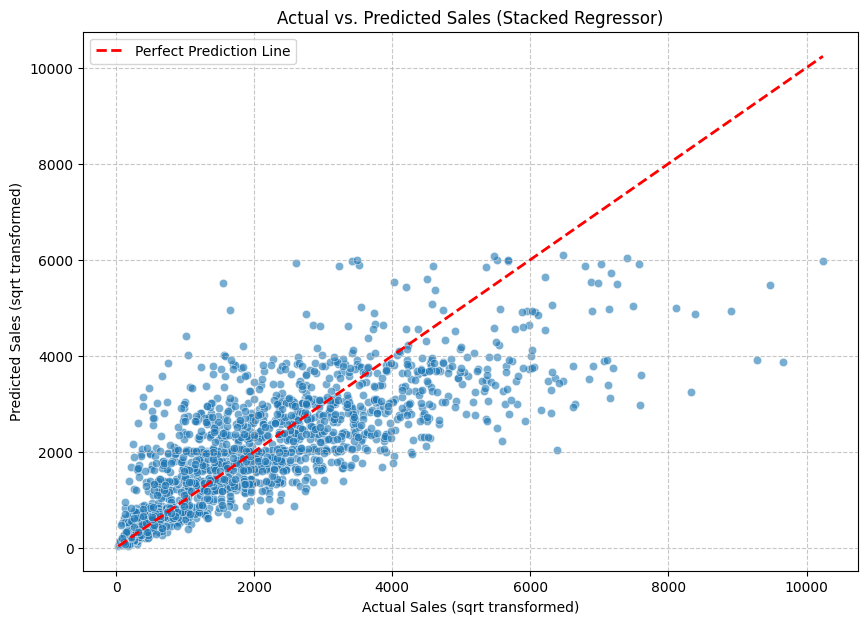

In [63]:
print("\n--- Generating Visualizations for Best Performed Model ---")

# 1. Actual vs. Predicted Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.6)
plt.plot([min(results_df['Actual']), max(results_df['Actual'])],
         [min(results_df['Actual']), max(results_df['Actual'])],
         color='red', linestyle='--', lw=2, label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Sales (Stacked Regressor)')
plt.xlabel('Actual Sales (sqrt transformed)')
plt.ylabel('Predicted Sales (sqrt transformed)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

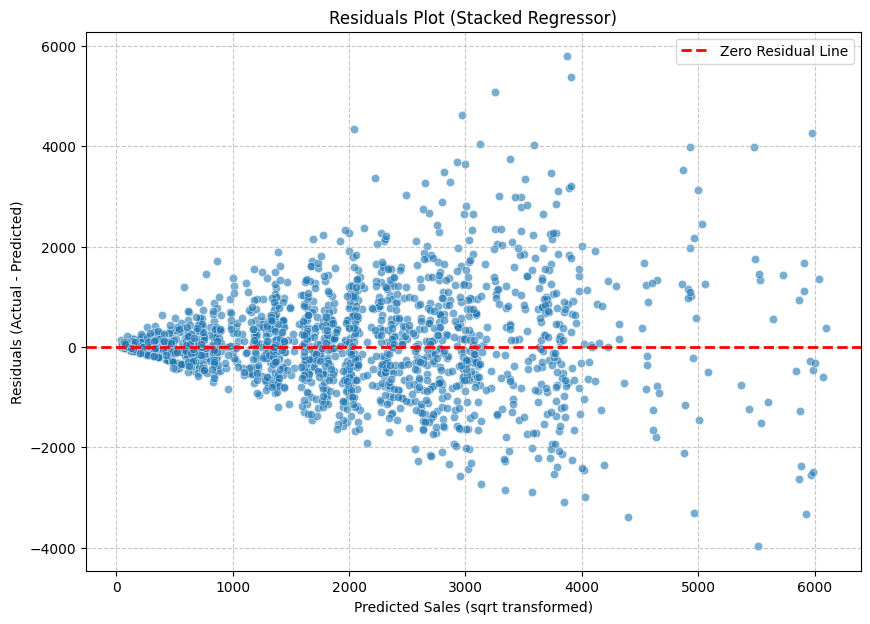

In [64]:
# 2. Residuals Plot (Residuals vs. Predicted)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Predicted', y='Residuals', data=results_df, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', lw=2, label='Zero Residual Line')
plt.title('Residuals Plot (Stacked Regressor)')
plt.xlabel('Predicted Sales (sqrt transformed)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

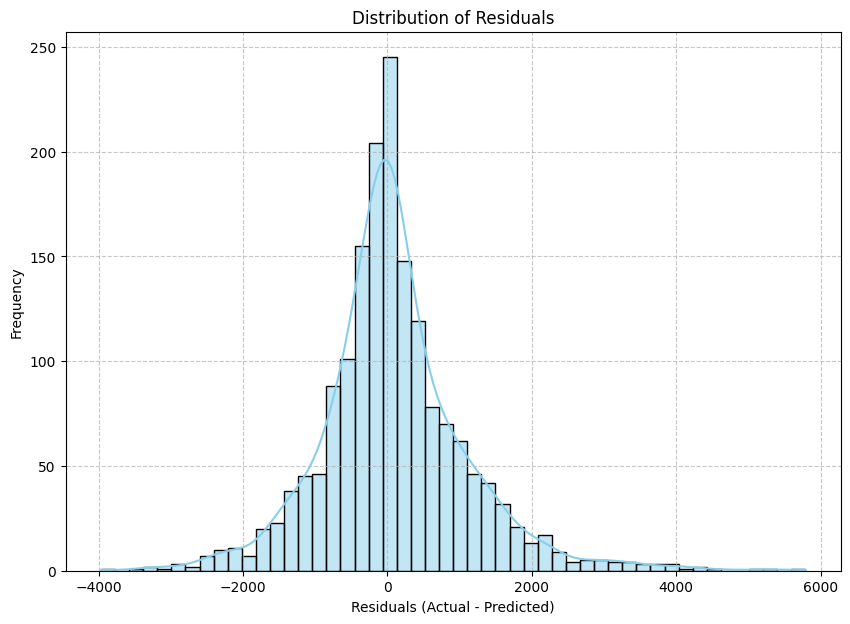

In [65]:
# 3. Distribution of Residuals
plt.figure(figsize=(10, 7))
sns.histplot(results_df['Residuals'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

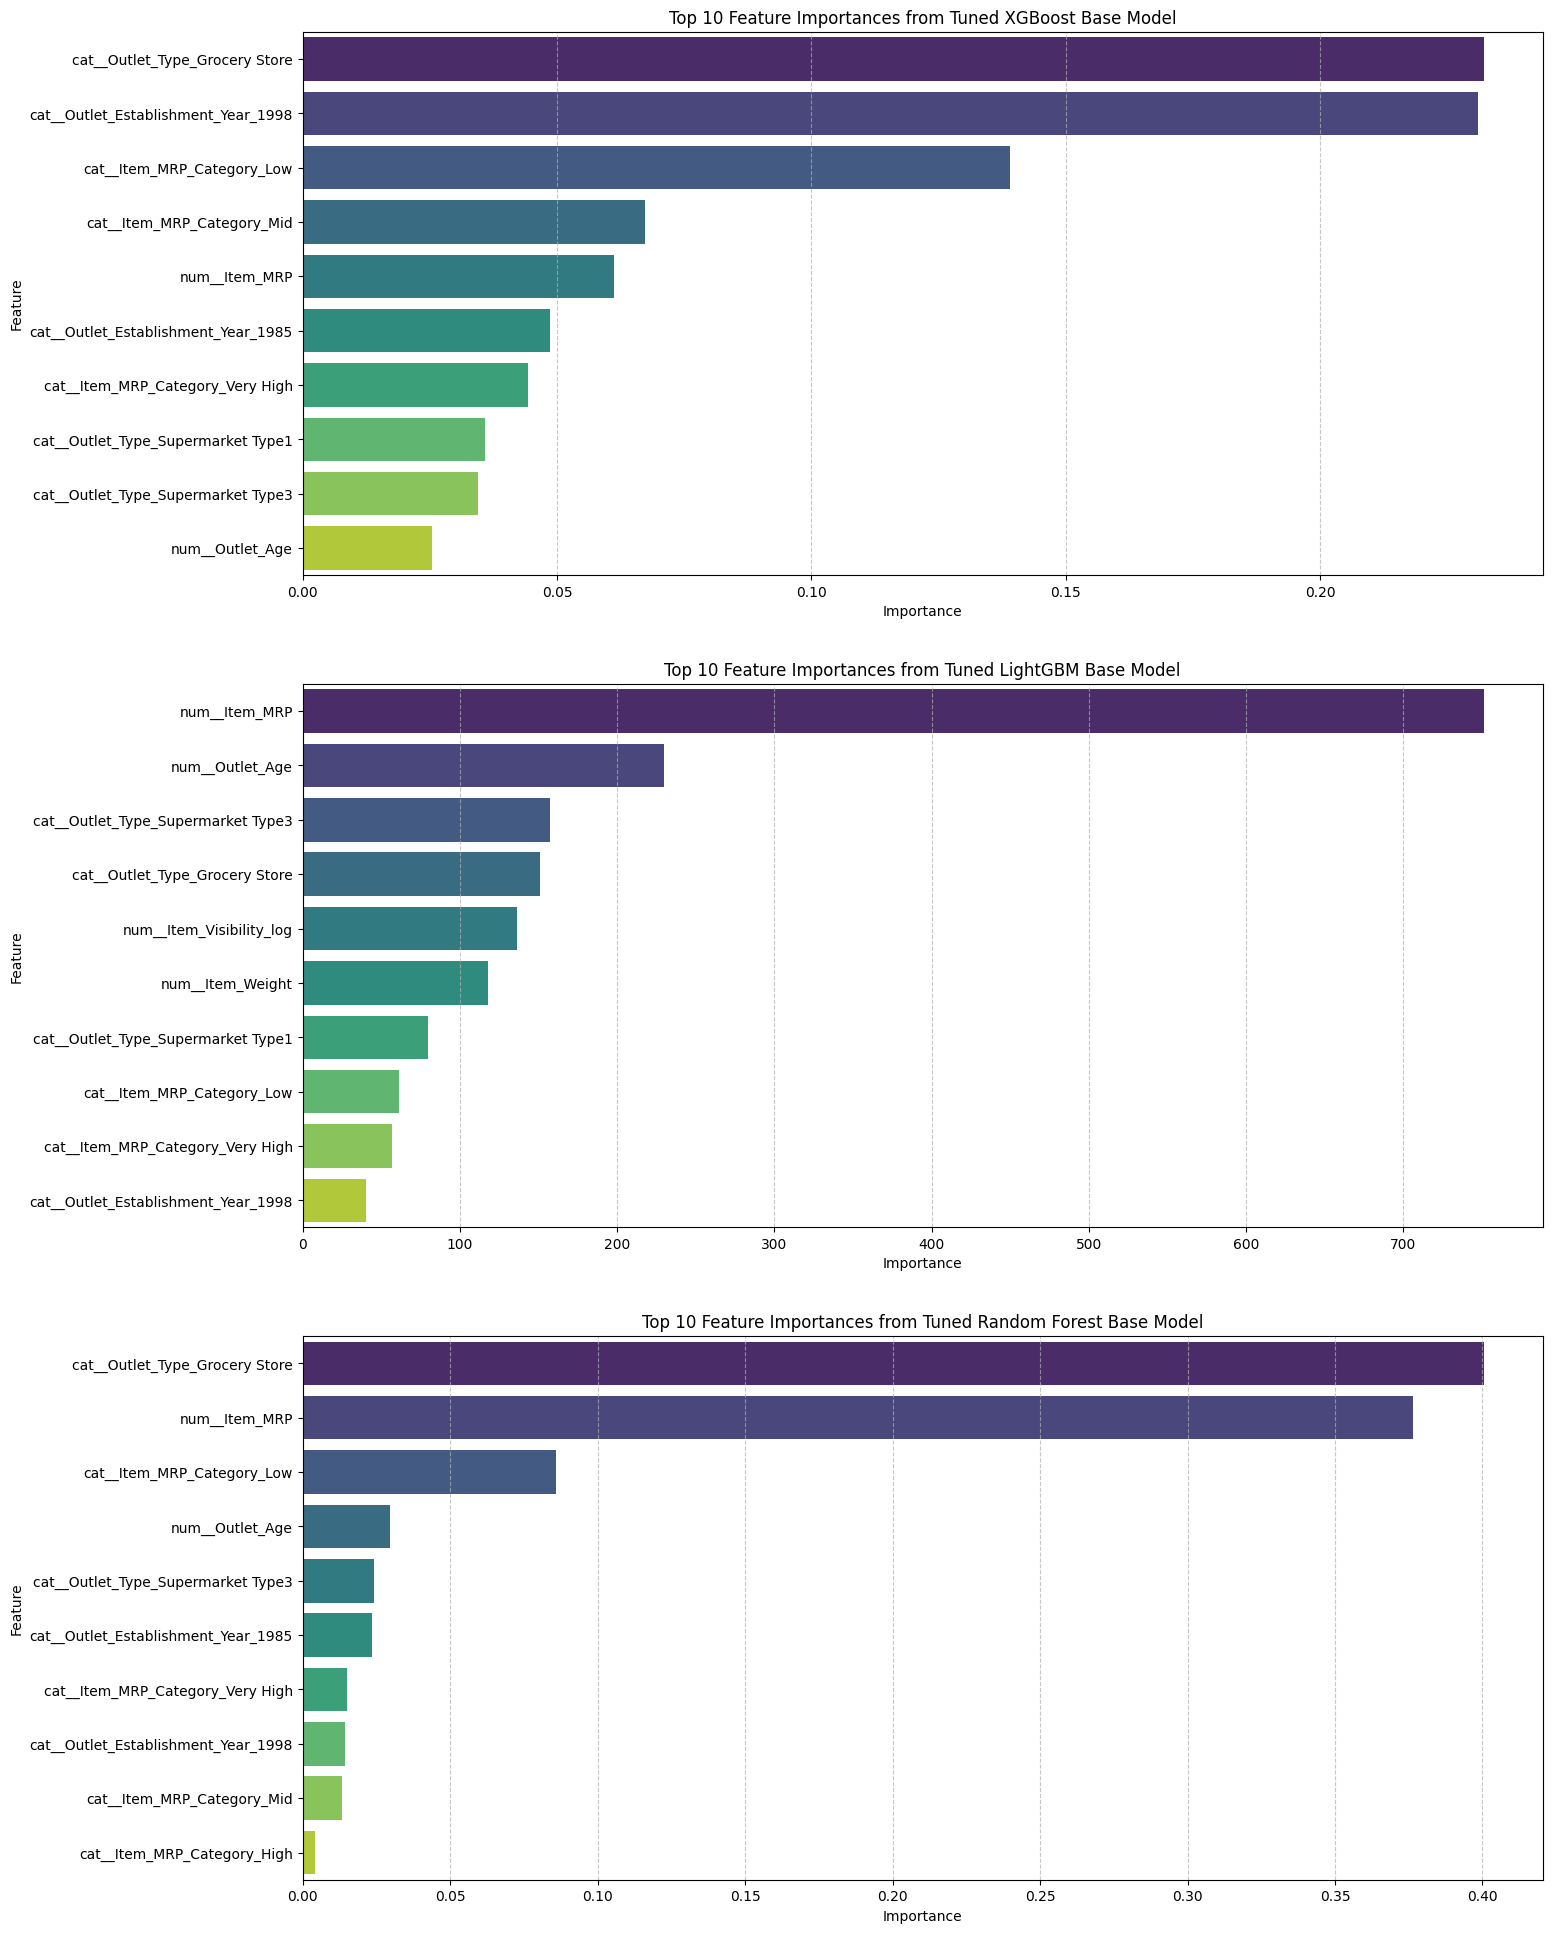

In [68]:
# 4. Feature Importance plot of all TUNED base models (XGBoost, LightGBM and Random Forest)
plt.figure(figsize=(16, 24))

# Hypertuned XGBoost
plt.subplot(3,1,1)
feature_importances_xgb = pd.Series(best_xgb_model.feature_importances_, index=X_train_processed_df.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances_xgb.head(10).values, y=feature_importances_xgb.head(10).index, hue=feature_importances_xgb.head(10).index, 
                palette='viridis', legend=False)
plt.title('Top 10 Feature Importances from Tuned XGBoost Base Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hypertuned LGBM
plt.subplot(3,1,2)
feature_importances_lgbm = pd.Series(best_lgbm_model.feature_importances_, index=X_train_processed_df.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances_lgbm.head(10).values, y=feature_importances_lgbm.head(10).index, hue=feature_importances_lgbm.head(10).index, 
            palette='viridis', legend=False)
plt.title('Top 10 Feature Importances from Tuned LightGBM Base Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hypertuned Random Forest
plt.subplot(3,1,3)
feature_importances_rf = pd.Series(best_rf_model.feature_importances_, index=X_train_processed_df.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances_rf.head(10).values, y=feature_importances_rf.head(10).index, hue=feature_importances_rf.head(10).index, 
            palette='viridis', legend=False)
plt.title('Top 10 Feature Importances from Tuned Random Forest Base Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

## 10. Saving the Model

In [69]:
# 1. Define the directory
import os

base_dir = 'saved_models'
sub_dir = 'bigmart_sales_prediction_models'
full_path = os.path.join(base_dir, sub_dir)

# 2. Create the directory if it doesn't exist
if not os.path.exists(full_path):
    os.makedirs(full_path)
    print(f"Created directory: '{full_path}'")
else:
    print(f"Directory '{full_path}' already exists.")

# 3. Define the full path for your model file and pipeline
model_filename = os.path.join(full_path, 'Big_Mart_Sales_Prediction_model.joblib')
preprocessor_filename = os.path.join(full_path, 'StandardScaler_OneHotEncoder_pipeline.joblib')

# 4. Save the model and preprocessor
try:
    joblib.dump(stacked_model_tuned_bases, model_filename)
    joblib.dump(preprocessor, preprocessor_filename)
    print(f"\nModel and preprocessor successfully saved to: '{full_path}'")
except Exception as e:
    print(f"Error saving files: {e}")

Created directory: 'saved_models\bigmart_sales_prediction_models'

Model and preprocessor successfully saved to: 'saved_models\bigmart_sales_prediction_models'


In [71]:
# --- How to load the model later ---
# loaded_pipeline = joblib.load(preprocessor_filename)
# loaded_model = joblib.load(model_filename)
# print("Model loaded successfully!")
# new_data['Item_Visibility'] = np.log1p(new_data['Item_Visibility'])
# You can then use Loaded_pipeline and loaded_model
# new_data_processed = loaded_pipeline.transform(new_data)
# predictions = loaded_model.predict(new_data_processed)

## 11. Conclusion

In this project, we successfully developed a robust and high-performing machine learning model to predict Big Mart sales. The entire data science lifecycle was followed, starting with a comprehensive **Exploratory Data Analysis (EDA)** to understand the dataset's characteristics, including the positive skewness of key features like `Item_Visibility` and the target variable, `Item_Outlet_Sales`.

To address these data issues, we performed crucial feature engineering and preprocessing, which included creating new features (`Outlet_Age`, `Item_MRP_Category`), handling categorical data with one-hot encoding, and applying Log and SQRT transformations. The use of a `ColumnTransformer` was vital for creating a streamlined and reproducible preprocessing pipeline that prevented data leakage.

We evaluated several powerful tree-based models, including Random Forest, XGBoost, and LightGBM. Through careful **hyperparameter tuning**, we were able to mitigate overfitting and significantly improve model performance. Our final solution was a **stacked regressor** that combined the strengths of our best-tuned models. This ensemble approach resulted in our most accurate model, achieving an **R-squared of 0.6158** on the test set.

This project not only delivered a practical solution for Big Mart to forecast sales but also provided a comprehensive demonstration of key data science skills, including data cleaning, feature engineering, model selection, hyperparameter tuning, and ensemble modeling. The final model and preprocessing pipeline have been saved for future use and deployment.